### Autoren:
Mat. Nr.: 2888214, zuständig für Aufg. 2, 3, 5 <br>
Mat. Nr.: 3626401, zuständig für Aufg. 1, 4, 6

## Aufg. 1: Business Understanding

### Zielsetzung
Das Ziel dieses Projekts ist es, fünf potenzielle Städte für einen sechsmonatigen Aufenthalt als Remote Worker in der Kreativbranche zu identifizieren. Der Fokus liegt dabei auf tropisch warmen Ländern, da diese nicht nur ein angenehmes Klima bieten, sondern auch einzigartige wirtschaftliche und infrastrukturelle Eigenschaften aufweisen.

### Ausgangssituation und Fragestellungen
Wir arbeiten mit dem globalen „Cost of Living“-Datensatz von Kaggle, der uns detaillierte Informationen über Lebenshaltungskosten in Städten weltweit liefert. Anhand dieses Datensatzes wollen wir untersuchen, wie sich Lebenshaltungskosten und Infrastruktur in tropisch warmen Ländern im Vergleich zu Regionen wie Europa und Nordamerika darstellen. Unsere beiden Personen ernähren sich gerne Gesund, und legen daher auch viel Wert auf die Preise von Früchten & Obst und lokalen Essen. Sie betreiben ebenfalls viel Sport und haben kein Auto, weshalb Kosten für Freizeitaktivitäten und Öffentliche Verkersmittel großen Einfluss haben.

### Aufgestellte Hypothesen

1. **Tropisch warme Länder sind häufig touristisch geprägt.**  
   Es wird angenommen, dass tropische Länder aufgrund ihrer klimatischen und geografischen Merkmale oft als touristische Destinationen fungieren. Der damit verbundene touristische Einfluss könnte sich auf die lokale Preisstruktur auswirken, insbesondere in den Bereichen Unterkunft, Gastronomie und Freizeit, sowie Sommerkleidung, Sportartikel und alkoholische Getränke, da diese dadurch Teurer werden könnten.

2. **Tropische Länder weisen tendenziell niedrigere Lebenshaltungskosten auf als Städte in Europa und Nordamerika.**  
   Diese Hypothese basiert auf der Annahme, dass strukturelle wirtschaftliche Unterschiede – wie geringere durchschnittliche Einkommen, niedrigere Kaufkraft und eingeschränkter Zugang zu globalen Märkten – dazu führen, dass die Lebenshaltungskosten in tropisch warmen Ländern im Mittel unter denen entwickelter Volkswirtschaften liegen.

3. **Ein höherer Grad an Infrastruktur geht mit höheren Lebenshaltungskosten einher.**  
   Es wird vermutet, dass Städte mit besser ausgebauter Infrastruktur – insbesondere im Hinblick auf Internetzugang, Nahverkehr und Energieversorgung – ein höheres Preisniveau aufweisen. Diese Zusammenhänge könnten durch Investitionskosten, höhere Standards und ein allgemein urbaneres Umfeld erklärt werden, das typischerweise mit höheren Lebenshaltungskosten verbunden ist.

4. **Höhere Durchschnittsgehälter korrelieren mit höheren Wohnkosten.**  
   Diese Hypothese basiert auf der Annahme, dass das Mietpreisniveau an die lokale Kaufkraft gekoppelt ist. In Regionen mit höherem Einkommensniveau ist es wahrscheinlicher, dass höhere Mietpreise durchgesetzt werden können. Dadurch ergibt sich eine direkte Korrelation zwischen Einkommen und Wohnkosten.

5. **Die Kosten für öffentliche Verkehrsmittel stehen im Verhältnis zum lokalen Einkommensniveau.**  
   Es wird angenommen, dass die Preise für den öffentlichen Nahverkehr in Ländern mit geringerer Kaufkraft ebenfalls niedriger sind. Subventionierte Tarife oder ein geringeres Dienstleistungsniveau könnten dazu beitragen, dass die Transportkosten sich stärker am ökonomischen Umfeld der Bevölkerung orientieren.

6. **Freizeitkosten sind ein indirekter Indikator für den urbanen Lebensstandard.**  
   Die Hypothese geht davon aus, dass Städte mit höheren Freizeitkosten – etwa für Fitnessstudios, Kinos oder Sportanlagen – tendenziell ein höheres allgemeines Preisniveau und damit einen höheren Lebensstandard aufweisen. Solche Kosten können als Marker für Konsumverhalten und infrastrukturelle Ausstattung dienen.


### Weiteres Vorgehen
Auf Basis dieser Hypothesen werden wir in der Datenexploration und -analyse prüfen, inwiefern diese Zusammenhänge bestehen. Die gewonnenen Erkenntnisse sollen als Entscheidungsgrundlage dienen, um letztlich fünf Städte auszuwählen, die sowohl kosteneffizient als auch attraktiv hinsichtlich Klima, Infrastruktur und touristischem Potenzial sind.

## Aufg. 2: Data Preperation 
### Datenbereinigung und Zuordnung von Ländern zu Kontinenten

Zur Vorbereitung der Analyse wurden zunächst mehrere Schritte zur Datenbereinigung und -anreicherung durchgeführt:

1. **Einlesen und Filtern der Daten**  
   Der Datensatz `cost-of-living_v2.csv` enthält weltweite Informationen zu Lebenshaltungskosten. Zunächst wurden alle Einträge mit schlechter Datenqualität (`data_quality == 0`) entfernt, um Verzerrungen in der Analyse zu vermeiden. Anschließend wurde der DataFrame nach Ländern alphabetisch sortiert und die Indizes zurückgesetzt.

2. **Abruf aktueller Länderdaten mit Regionen (Kontinenten)**  
   Um die Daten regional auszuwerten, wurde eine API (`https://www.apicountries.com/countries`) verwendet, die Informationen über Länder und deren zugehörige Weltregionen bereitstellt. Die Antwort wurde in ein Dictionary (`country_to_continent`) überführt, in dem jedem Ländernamen der entsprechende Kontinent zugeordnet wurde. Dabei wurden auch alternative Schreibweisen berücksichtigt (z. B. "USA" für "United States of America").

3. **Fuzzy Matching zur Verbesserung der Länder-Zuordnung**  
   Da Ländernamen im Datensatz nicht immer exakt mit den offiziellen API-Bezeichnungen übereinstimmen (z. B. "South Korea" vs. "Korea, Republic of"), wurde ein mehrstufiges Matching-Verfahren eingesetzt:
   - Zunächst wird geprüft, ob der Ländername direkt im Mapping enthalten ist.
   - Falls nicht, wird das erste Wort des Ländernamens geprüft (z. B. "South").
   - Falls auch das keinen Treffer ergibt, wird ein Fuzzy-Matching-Algorithmus (über das `thefuzz`-Paket) verwendet, der auf Ähnlichkeiten zwischen Zeichenfolgen basiert. Nur Matches mit einer Ähnlichkeit über 80 % werden akzeptiert.

4. **Anreicherung des Datensatzes mit Kontinentinformationen**  
   Durch Anwendung der Funktion `find_best_match` auf die `country`-Spalte des ursprünglichen Datensatzes wurde jeder Stadt bzw. jedem Eintrag ein zugehöriger Kontinent zugeordnet. Diese Information bildet die Grundlage für weitere Auswertungen nach geografischen Regionen.

Diese Schritte stellen sicher, dass alle Länder konsistent klassifiziert sind und ermöglichen eine geografisch differenzierte Analyse der Lebenshaltungskosten weltweit.


In [60]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from thefuzz import process

def find_best_match(country):
    # Versuche zuerst ein direktes Mapping
    if country in country_to_continent:
        return country_to_continent[country]

    # Versuche es mit dem ersten Wort
    first_word = country.split()[0]
    if first_word in country_to_continent:
        return country_to_continent[first_word]

    # Falls kein direkter Treffer: Fuzzy Matching versuchen
    best_match, score = process.extractOne(country, country_to_continent.keys())
    if score > 80:  # 80 bedeutet "ziemlich sicher"
        return country_to_continent[best_match]

    # Falls nichts gefunden, None zurückgeben
    return None

# Entferne die Spalten mit schlechter Qualität
data = pd.read_csv("./data/cost-of-living_v2.csv")
data.drop(data[data['data_quality'] == 0].index, inplace=True)
data.sort_values(by=['country'], inplace=True)
data.reset_index(drop=True, inplace=True)


# Mappen der Länder zu Kontinenten
url = "https://www.apicountries.com/countries"
response = requests.get(url)
countries = response.json()

country_to_continent = {}
for item in countries:
    country_to_continent[item["name"]] = item["region"]

    if "altSpellings" in item:
        for alt_name in item["altSpellings"]:
            country_to_continent[alt_name] = item["region"]

data["continent"] = data["country"].apply(find_best_match)


## Aufg. 3: Data Exploration und Analyse
Untersuchen Sie den Datensatz in Bezug auf das Ziel nach den Regeln wie in der Vorlesung gelehrt. Nutzen Sie Markup, um wichtige Erkenntnisse zu dokumentieren.

Werten Sie sowohl Kontinente, Länder, Städte sinnvoll nach Ihren Zielen generell aus. Berücksichtigen Sie ihr Gruppenziel dabei spezifisch.

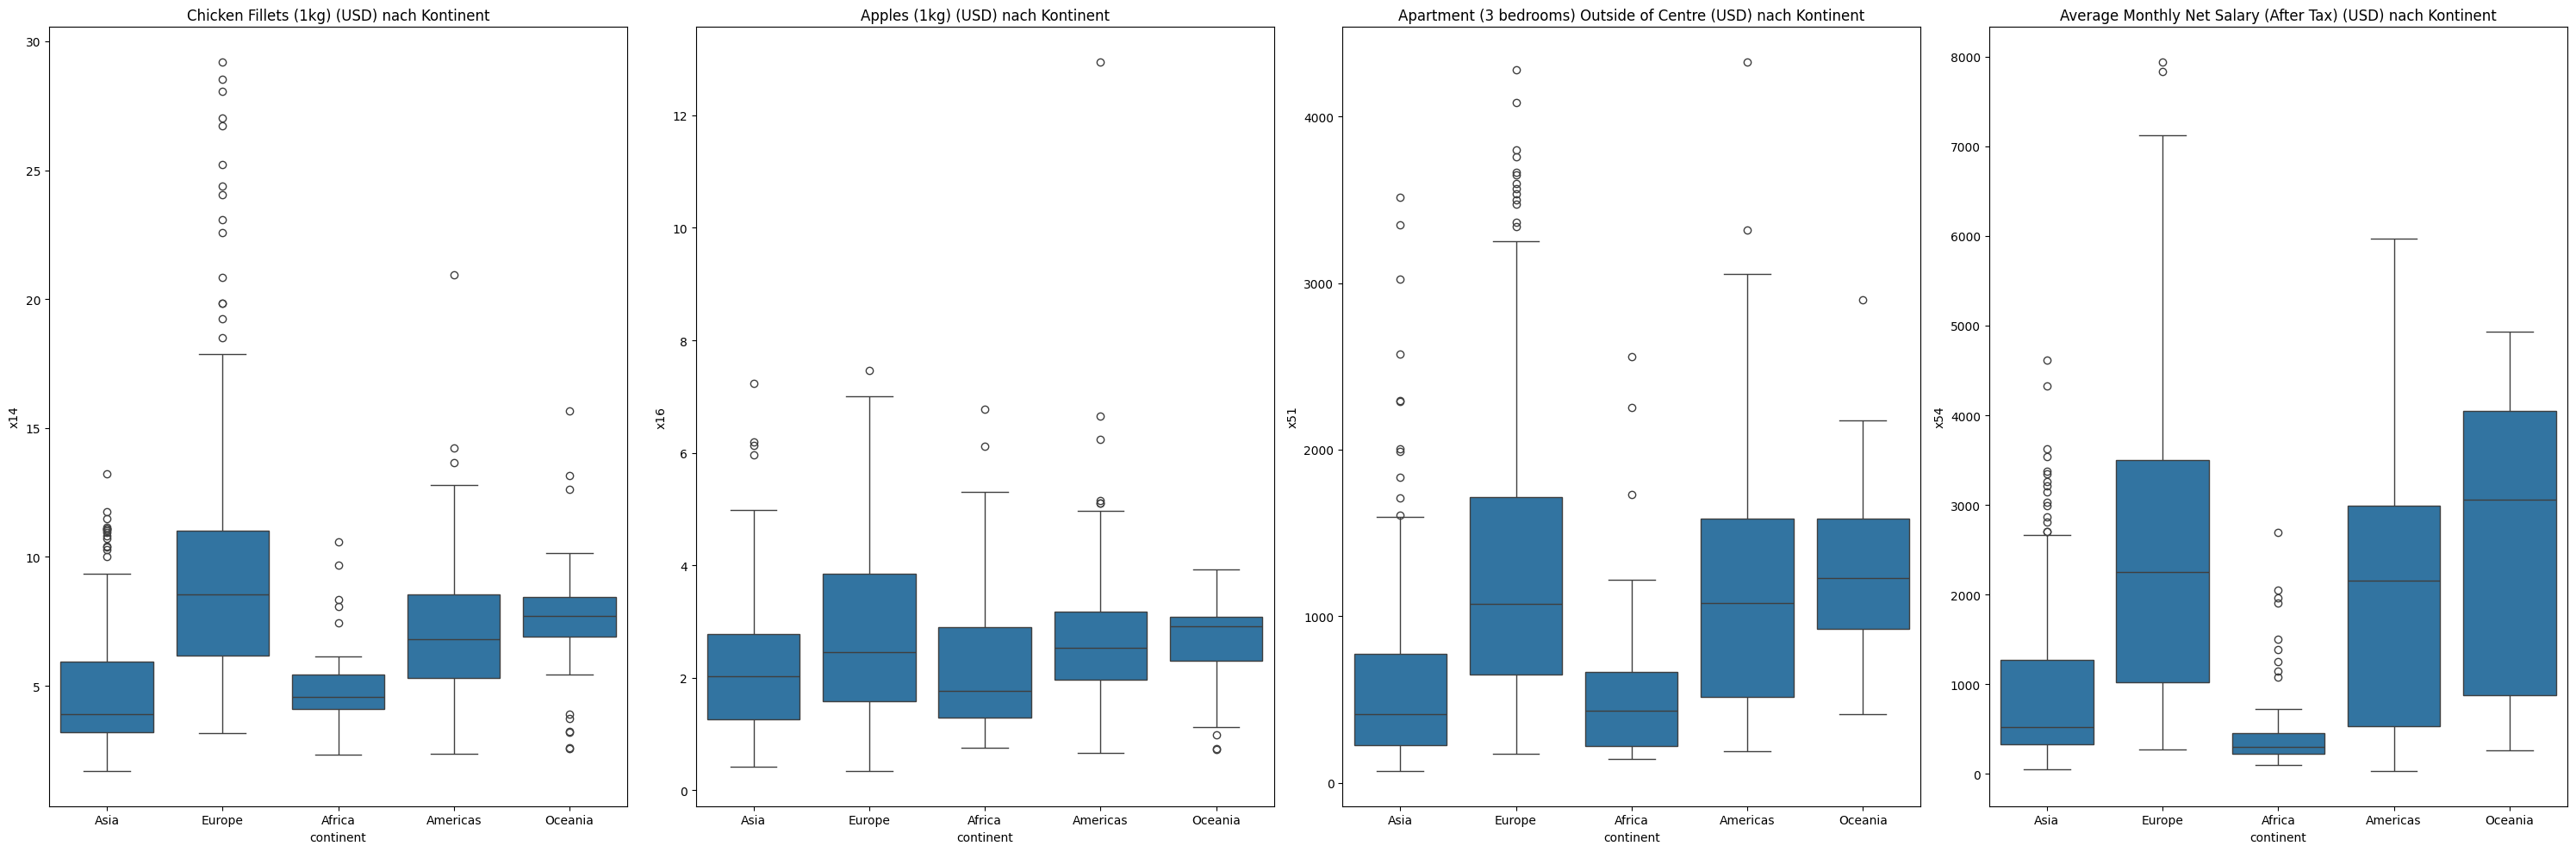

In [61]:
column_names = {
    'x16': 'Apples (1kg) (USD)',
    'x14' : 'Chicken Fillets (1kg) (USD)',
    'x28': 'ÖPNV Einzelfahrt',
    'x29': 'Monatsticket',
    'x30': 'Taxi Start',
    'x31': 'Taxi 1km',
    'x39': 'Fitnessstudio (monatlich)',
    'x40': 'Tennisplatz (1h, Wochenende)',
    'x41': 'Kino (1 Ticket)',
    'x51': 'Apartment (3 bedrooms) Outside of Centre (USD)',
    'x54': 'Average Monthly Net Salary (After Tax) (USD)'
}

fig, axes = plt.subplots(1, 4, figsize=(30, 10))
numeric_columns = ['x14','x16', 'x51', 'x54']

for ax, column in zip(axes, numeric_columns):
    sns.boxplot(x='continent', y=column, data=data, ax=ax)
    ax.set_title(f"{column_names[column]} nach Kontinent")


plt.tight_layout()
plt.show()

### Analyse der Lebenshaltungskosten nach Kontinenten

Im Rahmen dieser Untersuchung wurden zentrale Ausgabenkategorien nach Kontinent differenziert analysiert, um die Eignung tropischer Regionen für Remote Work fundiert zu bewerten. Im Fokus standen Variablen, die für einen gesundheitsbewussten Lebensstil von besonderer Bedeutung sind – darunter Lebensmittelpreise, Wohnkosten sowie das durchschnittliche Nettoeinkommen.

#### Fleischpreise – Beispiel: Hähnchenbrustfilet (`x14`)
Die Analyse zeigt, dass insbesondere Europa ein signifikant höheres Preisniveau für Fleischprodukte wie Hähnchenbrustfilet aufweist. Demgegenüber bieten tropische Regionen wie Asien, Afrika und Teile Südamerikas deutlich niedrigere Preise. Dies stellt einen klaren Vorteil dar, wenn eine proteinreiche, ausgewogene Ernährung angestrebt wird – ein Aspekt, der für beruflich aktive Personen mit Fokus auf Gesundheit besonders relevant ist.

#### Obstpreise – Beispiel: Äpfel (`x16`)
Ein vergleichbares Bild ergibt sich bei Obst: Während Europa die höchsten Apfelpreise aufweist, liegen die Medianwerte in Asien und Afrika erheblich darunter. Diese Unterschiede deuten darauf hin, dass eine frische, vitaminreiche Ernährung in tropischen Ländern mit geringeren finanziellen Aufwendungen realisierbar ist – ein weiterer Pluspunkt bei der Wahl eines temporären Wohnortes im globalen Süden.

#### Wohnkosten – Beispiel: 3-Zimmer-Wohnung außerhalb des Zentrums (`x51`)
Die Wohnkosten in tropischen Regionen fallen im Vergleich zu Europa und Nordamerika signifikant niedriger aus. Dies gilt sowohl für Mietpreise im Stadtzentrum als auch in peripheren Lagen. Die geringeren Mietkosten ermöglichen es, größeren Wohnraum zu günstigeren Konditionen zu mieten – ein erheblicher Vorteil bei längeren Auslandsaufenthalten und insbesondere dann, wenn Remote Work von zu Hause aus erfolgt.

#### Einkommen – Durchschnittliches Nettoeinkommen (`x54`)
Das durchschnittliche monatliche Nettoeinkommen ist in Europa und Nordamerika deutlich höher als in tropischen Ländern. Dieser Unterschied ist jedoch im Kontext dieser Untersuchung von untergeordneter Bedeutung, da Remote Worker ihr Einkommen nicht lokal generieren. Vielmehr ergibt sich hieraus ein strategischer Vorteil: Ein international konkurrenzfähiges Einkommen lässt sich in tropischen Ländern aufgrund der niedrigeren Lebenshaltungskosten effektiver nutzen.


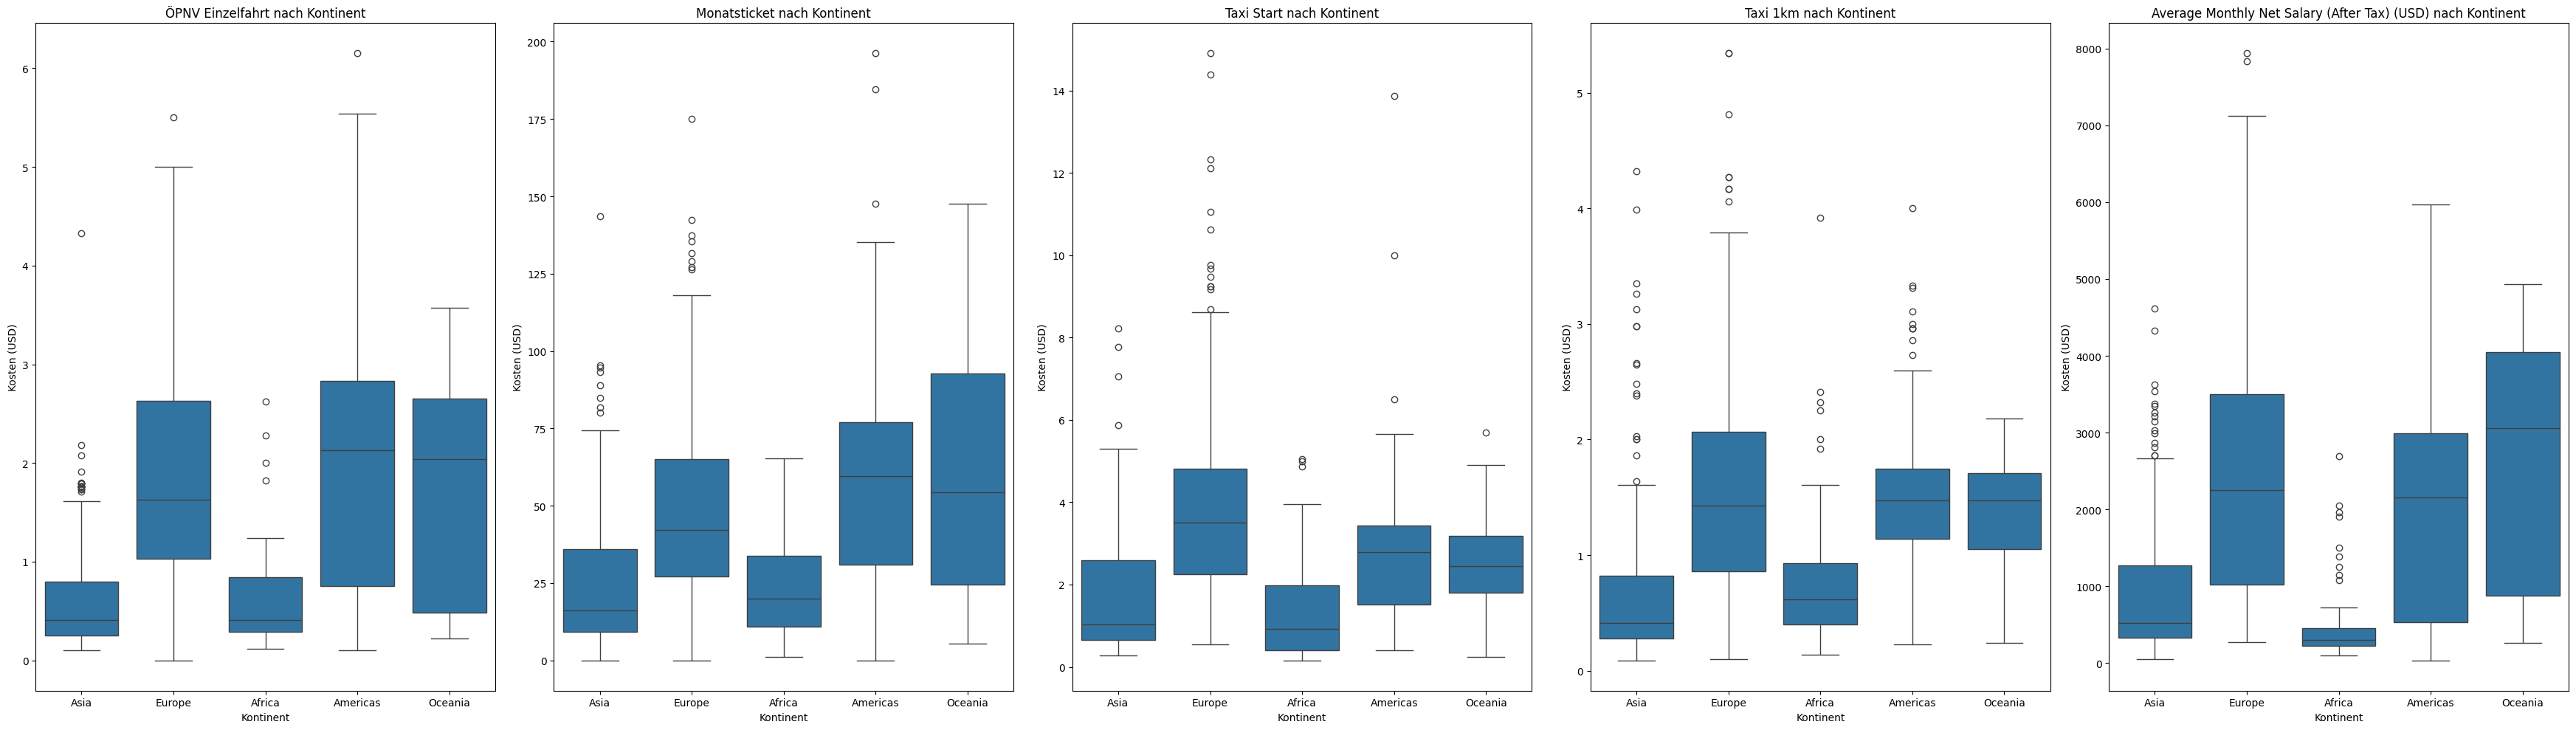

In [62]:
transport_columns = ['x28',
                     'x29',
                     'x30',
                     'x31'
]

fig, axes = plt.subplots(1, 5, figsize=(35, 10))
transport_columns = ['x28', 'x29', 'x30', 'x31','x54']

for ax, column in zip(axes, transport_columns):
    sns.boxplot(x='continent', y=column, data=data, ax=ax)
    ax.set_title(f"{column_names[column]} nach Kontinent")
    ax.set_xlabel("Kontinent")
    ax.set_ylabel("Kosten (USD)")

plt.tight_layout()
plt.show()


### Analyse der Mobilitätskosten nach Kontinent

Die grafische Auswertung stellt die Kosten verschiedener Mobilitätsformen – darunter Einzelfahrten im öffentlichen Nahverkehr, Monatstickets sowie Taxikosten (Starttarif und Preis pro Kilometer) – im interkontinentalen Vergleich dar. Auffällig ist, dass insbesondere **asiatische und afrikanische Städte** ein vergleichsweise niedriges Preisniveau in allen betrachteten Mobilitätskategorien aufweisen.

Bei **Einzelfahrten im ÖPNV** liegen die Medianwerte in Asien und Afrika deutlich unter denen in Europa, den Amerikas und Ozeanien. Noch deutlicher zeigt sich dieser Trend bei **Monatstickets**, bei denen die langfristigen Mobilitätskosten in Europa und Ozeanien rund doppelt so hoch ausfallen wie in Afrika oder Asien. Auch die **Taxikosten** – sowohl beim Starttarif als auch beim Preis pro Kilometer – folgen demselben Muster: Europa ist hier durchweg teurer, während asiatische und afrikanische Städte günstige Alternativen bieten.

### Einordnung im Kontext des Projekts

Für Remote Worker, die im Zielland kein eigenes Fahrzeug nutzen möchten, ist eine erschwingliche Mobilität entscheidend. Die Ergebnisse deuten darauf hin, dass insbesondere Städte in **Asien und Afrika** deutliche Kostenvorteile bei Alltagsmobilität bieten. Diese Aspekte sind besonders für eine sechsmonatige Aufenthaltsplanung von Bedeutung, da sie fixe Ausgaben betreffen, die regelmäßig anfallen. Die niedrigeren Kosten in diesen Regionen können somit zu einer effizienteren Budgetplanung beitragen und die Lebensqualität vor Ort erhöhen.


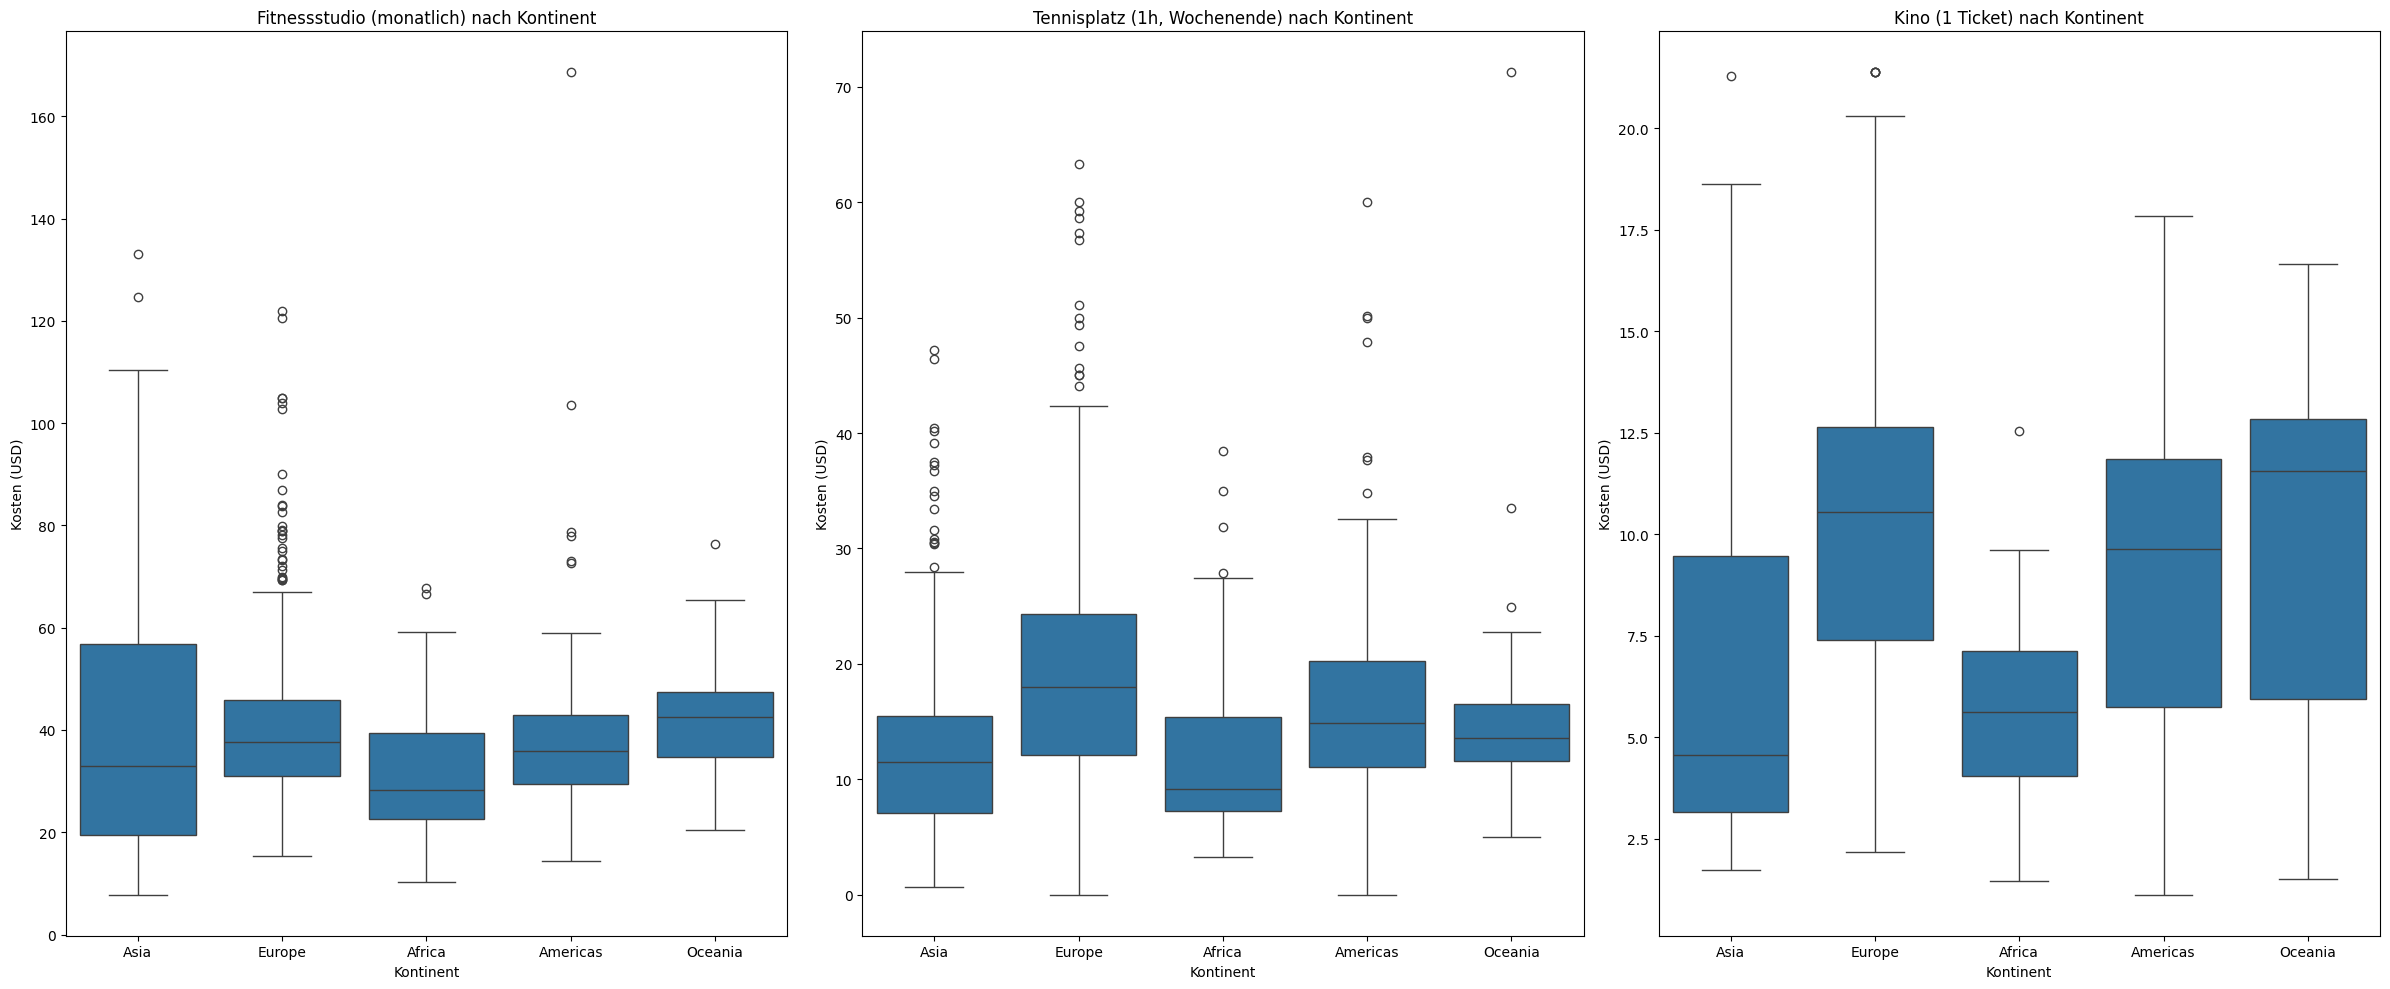

In [63]:
freizeit_columns = ['x39',
                    'x40',
                    'x41']

fig, axes = plt.subplots(1, 3, figsize=(24, 10))
freizeit_columns = ['x39', 'x40', 'x41']

for ax, column in zip(axes, freizeit_columns):
    sns.boxplot(x='continent', y=column, data=data, ax=ax)
    ax.set_title(f"{column_names[column]} nach Kontinent")
    ax.set_xlabel("Kontinent")
    ax.set_ylabel("Kosten (USD)")

plt.tight_layout()
plt.show()


### Analyse der Freizeit- und Sportkosten nach Kontinent

Die grafische Darstellung analysiert drei zentrale Kostenfaktoren für die Freizeitgestaltung: monatliche Mitgliedschaften im Fitnessstudio, die stündliche Miete eines Tennisplatzes am Wochenende sowie den Preis für ein Kinoticket. Diese Ausgaben spielen eine zentrale Rolle für Personen, die auch im Ausland einen aktiven, gesundheitsorientierten Lebensstil pflegen möchten.

Im Bereich der **Fitnessstudio-Kosten** zeigt sich, dass der Median in Asien zwar moderat ausfällt, die Spannweite der Preise jedoch sehr hoch ist. Das bedeutet, dass neben günstigen auch sehr teure Fitnessangebote existieren. Afrika und die Amerikas bieten vergleichbare Medianwerte, während Europa und insbesondere Ozeanien insgesamt höhere Kosten aufweisen.

Die **Mietkosten für Tennisplätze** sind am stärksten in Europa ausgeprägt, gefolgt von Ozeanien. Afrika und Asien liegen deutlich darunter, was nahelegt, dass sportliche Aktivitäten im Freien dort erschwinglicher sind. In Afrika ist zudem die Varianz besonders gering, was auf ein stabiles Preisniveau hindeutet.

Bei den **Kinopreisen** ergibt sich ein klareres Bild: In Afrika und Asien sind die Ticketpreise im Durchschnitt am niedrigsten. Europa, die Amerikas und Ozeanien bewegen sich hingegen auf einem höheren Niveau, mit Europa als Spitzenreiter in Bezug auf die Preisverteilung.

### Interpretation im Hinblick auf das Projektziel

Für Remote Worker, die auch im Ausland nicht auf regelmäßige sportliche und kulturelle Aktivitäten verzichten möchten, sind diese Kosten ein relevanter Faktor bei der Auswahl eines geeigneten Standorts. Die Analyse zeigt, dass vor allem **asiatische und afrikanische Städte** ein günstiges Preisniveau in diesen Bereichen aufweisen – sowohl im Fitness- als auch im Kulturbereich. Damit bieten diese Regionen nicht nur klimatische und wirtschaftliche Vorteile, sondern auch finanziellen Spielraum für eine ausgeglichene Work-Life-Balance.


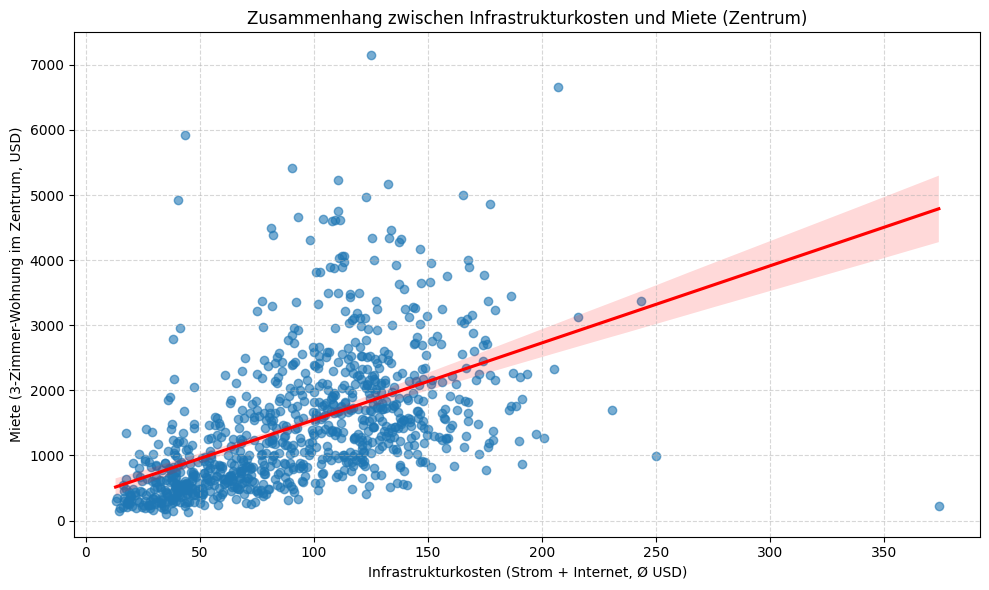

In [64]:
infrastructure = data.copy()
infrastructure['infrastruktur_index'] = infrastructure[['x36', 'x38']].mean(axis=1).copy()

plt.figure(figsize=(10, 6))
sns.regplot(data=infrastructure, x='infrastruktur_index', y='x50', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Zusammenhang zwischen Infrastrukturkosten und Miete (Zentrum)')
plt.xlabel('Infrastrukturkosten (Strom + Internet, Ø USD)')
plt.ylabel('Miete (3-Zimmer-Wohnung im Zentrum, USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Hypothese 3:
> **Ein höherer Grad an Infrastruktur geht mit höheren Lebenshaltungskosten einher.**  
> Es wird vermutet, dass Städte mit besser ausgebauter Infrastruktur – insbesondere im Hinblick auf Internetzugang, Nahverkehr und Energieversorgung – ein höheres Preisniveau aufweisen. Diese Zusammenhänge könnten durch Investitionskosten, höhere Standards und ein allgemein urbaneres Umfeld erklärt werden, das typischerweise mit höheren Lebenshaltungskosten verbunden ist.

### Analyse des Scatterplots  
Zur Überprüfung dieser Hypothese wurde ein Scatterplot erstellt, der die durchschnittlichen Infrastrukturkosten – gebildet aus den monatlichen Ausgaben für Strom und Internet – den Mietpreisen für eine 3-Zimmer-Wohnung im Stadtzentrum gegenüberstellt. Die grafische Darstellung zeigt einen insgesamt positiven Trend: Städte mit höheren Ausgaben für Strom und Internet tendieren auch zu höheren Mietpreisen im Zentrum. Die eingefügte Regressionslinie unterstreicht diesen linearen Zusammenhang, auch wenn eine gewisse Streuung in den Daten erkennbar bleibt. Diese Streuung deutet darauf hin, dass regionale Besonderheiten oder andere Faktoren – etwa politische Rahmenbedingungen, Subventionen oder wirtschaftliche Struktur – ebenfalls eine Rolle spielen können.

### Einordnung in die Hypothese  
Die Ergebnisse der Visualisierung liefern eine gute empirische Unterstützung für Hypothese 3. Der beobachtete Zusammenhang spricht dafür, dass infrastrukturell stärker ausgebaute Städte ein höheres allgemeines Preisniveau aufweisen – zumindest in Bezug auf Strom, Internet und zentrale Mietkosten. Auch inhaltlich passt diese Beobachtung zu den Annahmen: Infrastrukturausbau erfordert Investitionen, die sich möglicherweise in Form höherer Kosten für die Bevölkerung widerspiegeln.

### Kritische Bewertung  
Obwohl der Zusammenhang grundsätzlich erkennbar ist, lässt sich keine perfekte lineare Beziehung feststellen. Die Verteilung der Datenpunkte zeigt, dass es durchaus Ausreißer gibt, bei denen hohe Infrastrukturkosten nicht zwangsläufig mit entsprechend hohen Mieten einhergehen – und umgekehrt. Solche Abweichungen könnten auf lokale Besonderheiten zurückzuführen sein, etwa stark subventionierte Lebenshaltungskosten, regionale Preisregulierungen oder Unterschiede in der wirtschaftlichen Leistungsfähigkeit. Zudem muss betont werden, dass es sich bei dem Scatterplot um eine Korrelationsanalyse handelt: Ein statistischer Zusammenhang lässt sich zwar beobachten, daraus kann jedoch keine kausale Beziehung abgeleitet werden.

Ein weiterer Aspekt betrifft mögliche regionale Unterschiede. Es ist denkbar, dass der Zusammenhang in bestimmten Teilen der Welt – etwa in Südostasien oder Westeuropa – stärker oder schwächer ausgeprägt ist. Eine weiterführende Analyse könnte daher darin bestehen, die Korrelation für einzelne Kontinente oder Einkommensgruppen gesondert zu betrachten.  
### Fazit  
Insgesamt bestätigt der Scatterplot die grundlegende Annahme der dritten Hypothese: Ein höheres infrastrukturelles Niveau scheint mit höheren Mietpreisen zu korrelieren. Zwar zeigt sich keine strenge lineare Beziehung, doch die Tendenz ist deutlich und unterstützt die Idee, dass moderne, gut ausgebaute Städte in vielen Fällen auch mit höheren Lebenshaltungskosten verbunden sind.


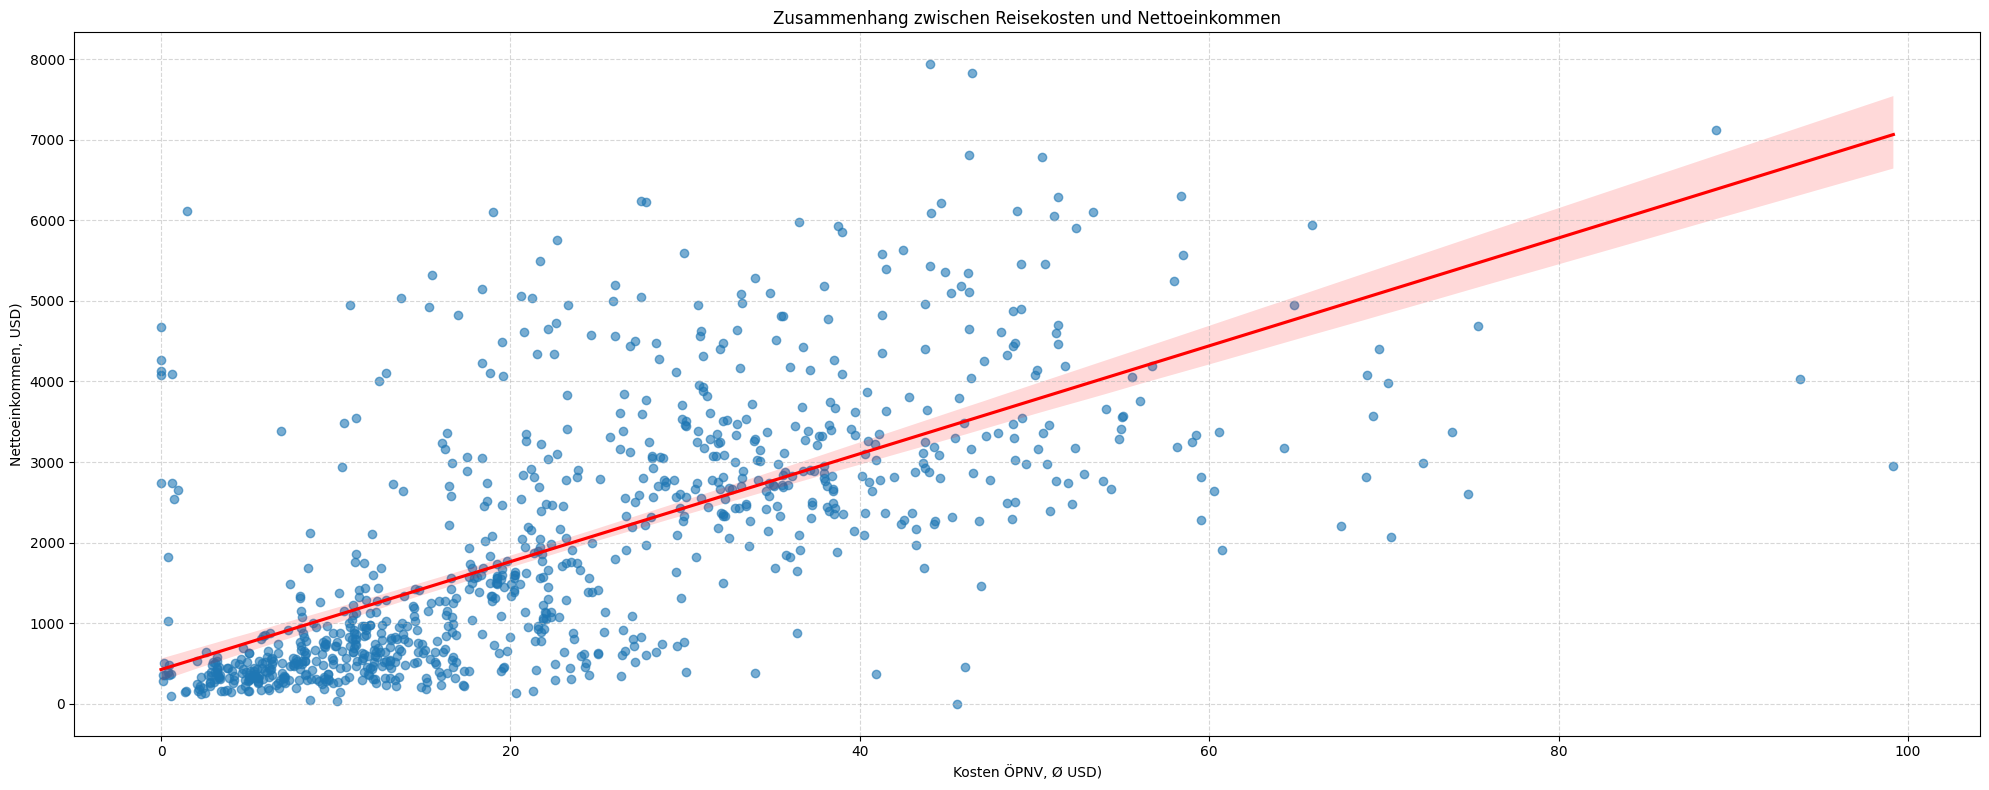

In [86]:
travel = data.copy()
travel['travel_index'] = travel[['x28','x29']].mean(axis=1).copy()

plt.figure(figsize=(20, 8))
sns.regplot(data=travel, x='travel_index', y='x54', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Zusammenhang zwischen Reisekosten und Nettoeinkommen')
plt.xlabel('Kosten ÖPNV, Ø USD)')
plt.ylabel('Nettoeinkommen, USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Hypothese 5:
> **Die Kosten für öffentliche Verkehrsmittel stehen im Verhältnis zum lokalen Einkommensniveau.**  
> Es wird angenommen, dass die Preise für den öffentlichen Nahverkehr in Ländern mit geringerer Kaufkraft ebenfalls niedriger sind. Subventionierte Tarife oder ein geringeres Dienstleistungsniveau könnten dazu beitragen, dass sich die Transportkosten stärker am ökonomischen Umfeld der Bevölkerung orientieren.

### Analyse des Scatterplots  
Der Scatterplot visualisiert den Zusammenhang zwischen den durchschnittlichen Kosten für den öffentlichen Nahverkehr (Einzelticket und Monatsticket) und dem durchschnittlichen Nettoeinkommen pro Stadt. Der Trend wird durch eine Regressionslinie mit Konfidenzintervall dargestellt.

Die Darstellung zeigt einen deutlich positiven Zusammenhang: Städte mit höheren ÖPNV-Kosten weisen tendenziell auch ein höheres monatliches Nettoeinkommen auf. Diese Beobachtung bestätigt die Erwartung, dass sich Preise für den öffentlichen Nahverkehr häufig am ökonomischen Umfeld der Bevölkerung orientieren. In Ländern mit geringerer Kaufkraft sind die ÖPNV-Tarife entsprechend niedriger, sei es durch staatliche Subventionen, geringere Lohnkosten oder einfach durch ein reduziertes Dienstleistungsangebot.

### Einordnung in die Hypothese  
Die Ergebnisse des Scatterplots stützen Hypothese 5 klar. Der beobachtete Trend zeigt, dass die Preise für Bus, Bahn oder U-Bahn mit dem Einkommensniveau steigen. Dies legt nahe, dass der öffentliche Verkehr häufig relativ erschwinglich zur Kaufkraft der lokalen Bevölkerung bleibt.

### Kritische Bewertung  
Obwohl ein positiver Trend deutlich erkennbar ist, gibt es – wie auch im Plot sichtbar – Ausreißer, bei denen etwa niedrige ÖPNV-Kosten mit relativ hohen Einkommen oder umgekehrt einhergehen. Solche Abweichungen könnten auf unterschiedliche Subventionsstrategien, Tarifmodelle oder Infrastrukturqualität zurückzuführen sein.

Zudem muss betont werden, dass es sich hierbei um eine Korrelation und keine Kausalität handelt. Der Trend liefert einen Hinweis auf einen Zusammenhang, beweist jedoch nicht, dass höhere Einkommen die Ursache für höhere ÖPNV-Preise sind (oder umgekehrt).

### Fazit  
Der Plot liefert eine fundierte empirische Unterstützung für Hypothese 5. Die Ergebnisse legen nahe, dass sich die Kosten des öffentlichen Nahverkehrs im internationalen Vergleich am lokalen Einkommen orientieren und somit Teil eines sozialverträglichen Preisniveaus sind. Dies macht den ÖPNV zu einem aussagekräftigen Indikator für die wirtschaftliche Struktur und das Preisgefüge einer Stadt.

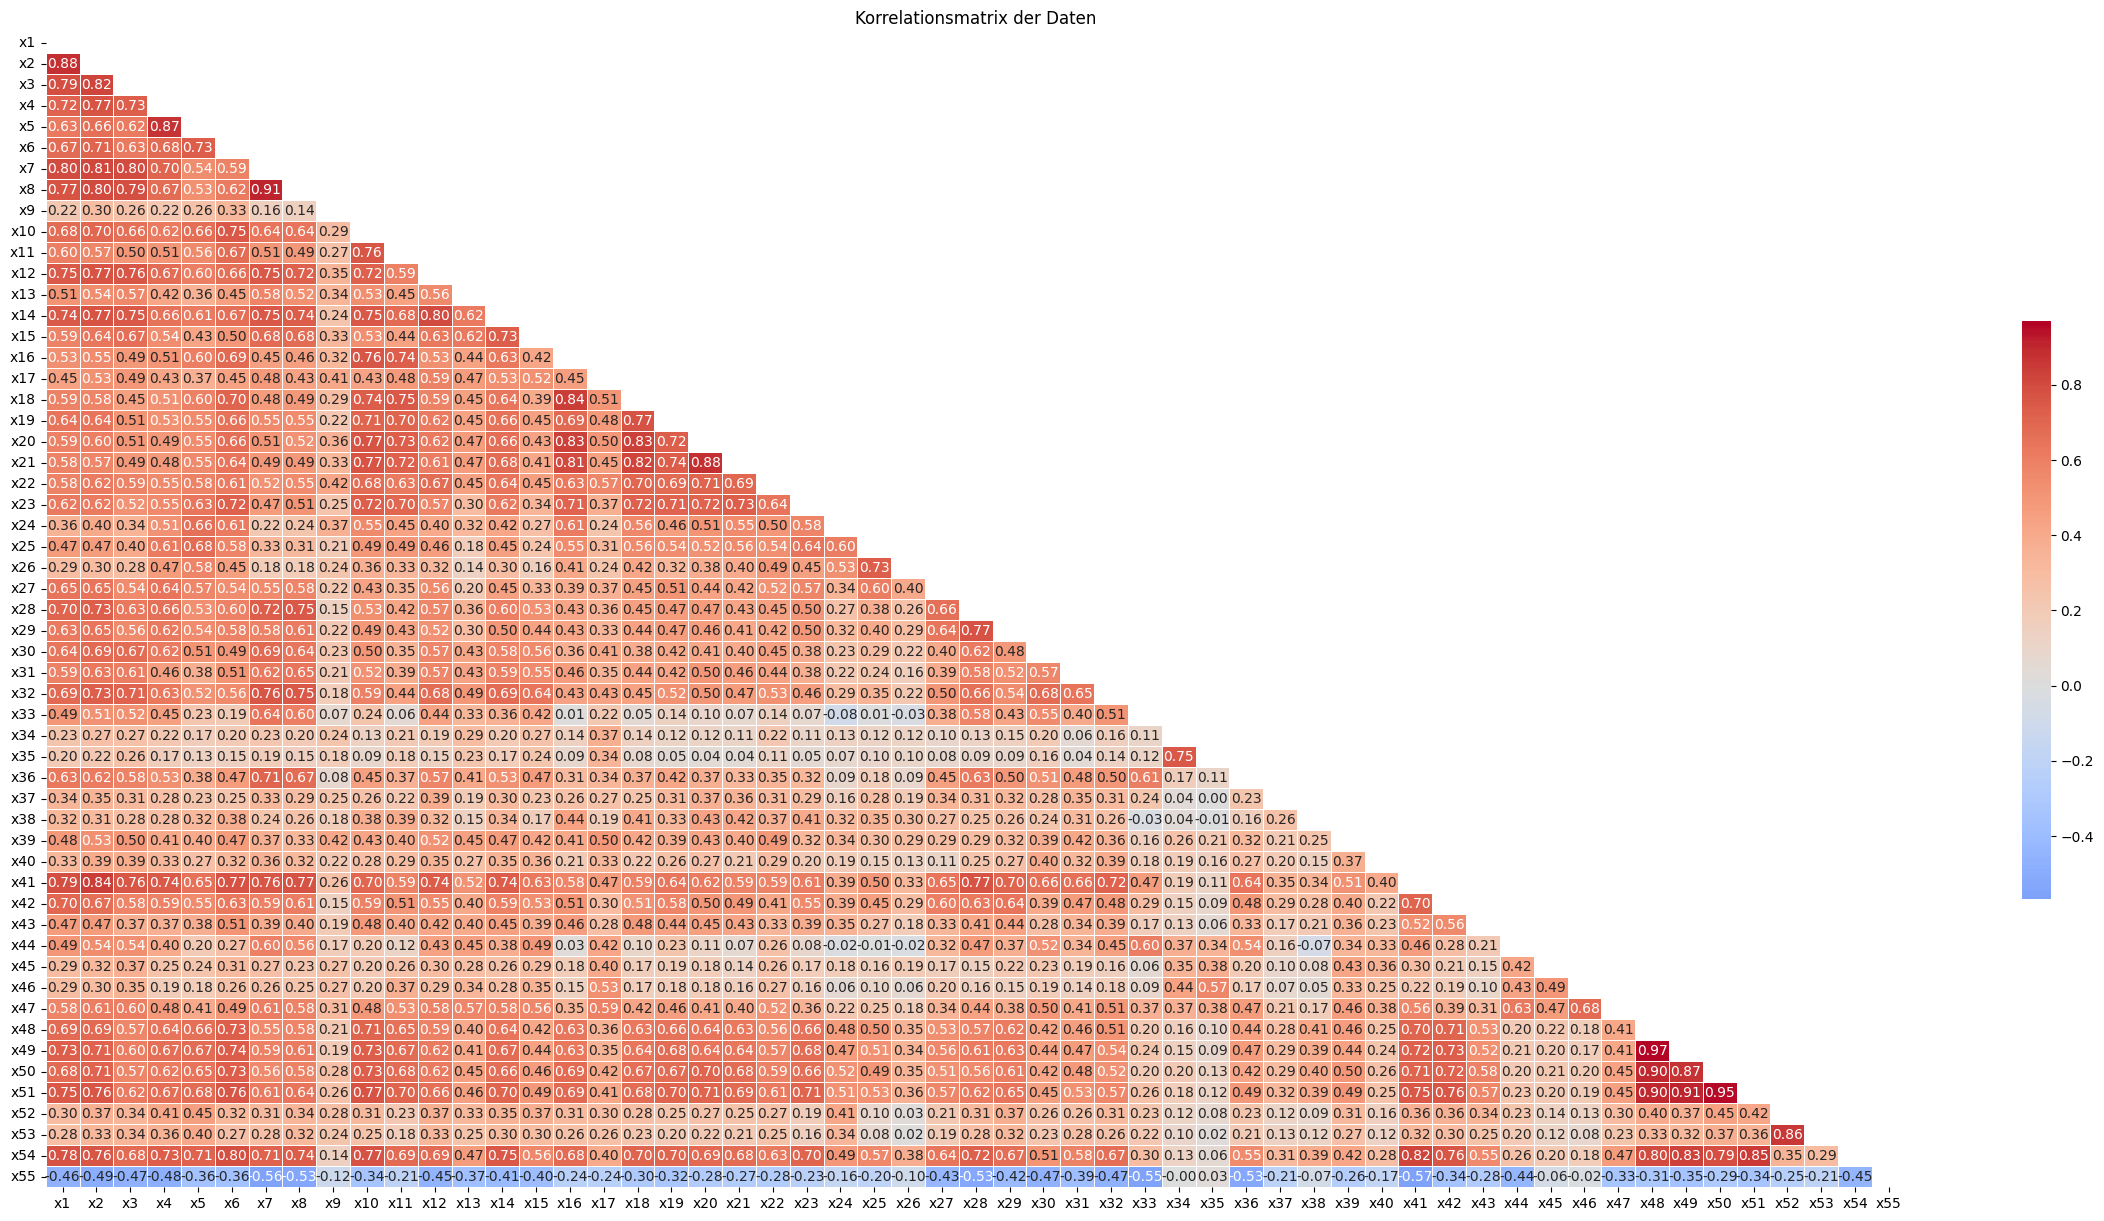

In [66]:
data.fillna(0, inplace=True)
data.drop(columns=['data_quality'], inplace=True)
corr = data.drop(columns=['city', 'country', 'continent']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(30, 15))
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, annot=True, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.title("Korrelationsmatrix der Daten")
plt.show()

### Analyse der Korrelationen im Gesamtdatensatz

Zur fundierten Bewertung der aufgestellten Hypothesen wurde eine Korrelationsmatrix erstellt, die Zusammenhänge zwischen den verschiedenen Lebenshaltungskosten, Infrastruktur- und Einkommensvariablen aufzeigt. Diese erlaubt es, erste Indikatoren für systematische Zusammenhänge zu identifizieren und zu prüfen, inwiefern sich die Hypothesen im Datenmaterial widerspiegeln.

---

#### Zusammenhang von Restaurant- und Lebensmittelpreisen

Innerhalb der Variablenbereiche `x1` bis `x6` (Preise für Restaurantbesuche) zeigt sich eine sehr hohe Korrelation (z. B. `x1` zu `x2`: 0.88), ebenso bei den Supermarktpreisen zwischen `x9` und `x21`, etwa `x13` zu `x14` mit 0.72. Das deutet darauf hin, dass Preisniveaus in diesen Bereichen eng miteinander verknüpft sind: In Städten mit teuren Restaurants sind in der Regel auch Supermarktprodukte kostenintensiver. Diese Beobachtung unterstützt indirekt Hypothese 1, indem sie nahelegt, dass touristisch geprägte Orte – die häufig über ein hohes Gastronomieangebot verfügen – auch in anderen Lebensbereichen ein erhöhtes Preisniveau aufweisen.

---

#### Einkommen im Verhältnis zu Wohnkosten

Ein zentrales Ergebnis der Korrelationsanalyse ist die starke Verbindung zwischen dem durchschnittlichen Nettoeinkommen (`x54`) und den Wohnkosten. Besonders auffällig ist die hohe Korrelation zu den Mietpreisen für große Wohnungen im Stadtzentrum (`x50` = 0.86), außerhalb des Zentrums (`x51` = 0.73) sowie zu den Wohnungskaufpreisen je Quadratmeter (`x52` = 0.83 im Zentrum, `x53` = 0.72 außerhalb). Diese Werte stützen Hypothese 4 und legen nahe, dass ein höheres Einkommensniveau auch mit höheren Wohnkosten einhergeht. Dieses Muster ist plausibel, da Städte mit hoher Kaufkraft auch höhere Mietpreise durchsetzen können – entweder durch höhere Nachfrage, oder durch ein besseres, teureres Wohnangebot. Der Zusammenhang reflektiert zudem den Entwicklungsgrad einer Stadt und ihre wirtschaftliche Struktur.

---

#### Einkommen und sonstige Lebenshaltungskosten

Auch bei anderen Lebenshaltungskosten zeigt sich eine moderate Korrelation mit dem Einkommen. So liegen die Korrelationswerte zwischen `x54` und Lebensmitteln oder Restaurants im Bereich von 0.3 bis 0.6. Dieses Ergebnis spricht für Hypothese 2 und 5, wonach sich wirtschaftlich stärkere Städte auch durch ein insgesamt höheres Preisniveau auszeichnen. In ärmeren Regionen hingegen sind sowohl Gehälter als auch Kosten für alltägliche Güter niedriger – eine wichtige Information für Remote Worker, deren Gehalt unabhängig vom lokalen Arbeitsmarkt ist. Für diese Zielgruppe ergibt sich daraus ein potenzieller Vorteil, da niedrigere Lebenshaltungskosten bei konstantem Einkommen den Lebensstandard effektiv erhöhen.

---

#### Rolle der Internetpreise

Ein bemerkenswerter Befund ist die vergleichsweise geringe Korrelation der Internetkosten (`x38`) mit den übrigen Variablen. Weder zu Mieten, Gehältern noch zu Infrastrukturvariablen besteht ein klarer Zusammenhang. Diese Unabhängigkeit macht Internetkosten zu einer eigenständigen Größe im Rahmen der Stadtbewertung – insbesondere für digitale Nomaden, die auf eine verlässliche und erschwingliche Internetverbindung angewiesen sind. In Hinblick auf Hypothese 3 bedeutet dies, dass nicht alle Infrastrukturelemente automatisch das allgemeine Preisniveau beeinflussen.

---

### Gesamtbewertung der Korrelationen im Kontext der Hypothesen

Die Korrelationsmatrix liefert eine breite empirische Basis zur Unterstützung mehrerer Hypothesen:

- **Hypothese 1 (Touristische Prägung)**: Wird gestützt durch stark korrelierende Preise in Gastronomie und Freizeit.
- **Hypothese 2 (Geringere Lebenshaltungskosten in Tropen)**: Moderate Korrelationen zeigen globale Muster zwischen Einkommen und Preisniveau.
- **Hypothese 3 (Infrastruktur & Kosten)**: Nur teilweise gestützt, da z. B. Internetkosten unabhängig von Mieten bleiben.
- **Hypothese 4 (Gehalt vs. Wohnkosten)**: Wird durch starke positive Korrelationen eindeutig unterstützt.
- **Hypothese 5 (ÖPNV vs. Einkommen)**: Korrelationen mit ÖPNV-Kosten wurden ergänzend visuell untersucht.
- **Hypothese 6 (Freizeitkosten als Indikator)**: Fitness- und Kinokosten korrelieren mittelstark mit Einkommen und anderen Preisen und könnten somit als Proxy für urbanen Lebensstandard dienen.

Die Ergebnisse bestätigen, dass viele Preisniveaus nicht isoliert auftreten, sondern in systematische Zusammenhänge eingebettet sind. Daraus ergeben sich wichtige Anhaltspunkte für eine faktenbasierte Entscheidungsfindung im Kontext von Remote Work und Standortwahl.


In [67]:
from bs4 import BeautifulSoup

url = "https://worldpopulationreview.com/country-rankings/tropical-countries"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
table = soup.find("table", class_="wpr-table min-w-full border-collapse")
rows = table.find_all("tr")
tropical_countries = []
for row in rows:
    cells = row.find_all("td")
    if len(cells) > 0:
        if "Fully Tropical" == cells[2].text.strip():
            tropical_countries.append(cells[1].text.strip())
print(len(data))
data_tropical = data[data["country"].isin(tropical_countries)].copy()
print(len(tropical_countries) - len(data_tropical), len(data_tropical))
print(set(tropical_countries) - set(data["country"].unique()))

923
18 78
{'Grenada', 'Dominica', 'Saint Lucia', 'Sierra Leone', 'British Virgin Islands', 'Vanuatu', 'Tuvalu', 'Kiribati', 'Saint Vincent and the Grenadines', 'Equatorial Guinea', 'Burundi', 'Marshall Islands', 'Niger', 'Benin', 'Micronesia', 'Laos', 'Liberia', 'Togo', 'Aruba', 'Guadeloupe', 'Timor-Leste', 'Burkina Faso', 'Gabon', 'Sao Tome and Principe', 'Mauritania', 'El Salvador', 'Comoros', 'Martinique', 'Nauru', 'Trinidad and Tobago', 'Guinea-Bissau', 'French Guiana', 'Gambia', 'Tonga', 'Guinea', 'Suriname', 'United States Virgin Islands', 'Mauritius', 'Central African Republic', 'Samoa', 'South Sudan', 'Saint Kitts and Nevis', 'Djibouti', 'Eritrea', 'DR Congo', 'Antigua and Barbuda', 'Cape Verde', 'Chad', 'Mali', 'Palau', 'Haiti', 'Solomon Islands', 'Republic of the Congo', 'Angola'}


Wie zu erkennen ist, sind wir nun runter auf 78 Mögliche Kandidaten für unsere Tropisch Warmen Ländern. Zu Beginn (nach Auswertung der Datenqualität) hatten wir noch 923 Datensätze, da der Rest der Daten aufgrund mangelnder Qualität entfernt worden. Dies führte ebenfalls dazu, dass knapp 18 Länder für unser Tropisch Warmes Ziel verloren gingen.

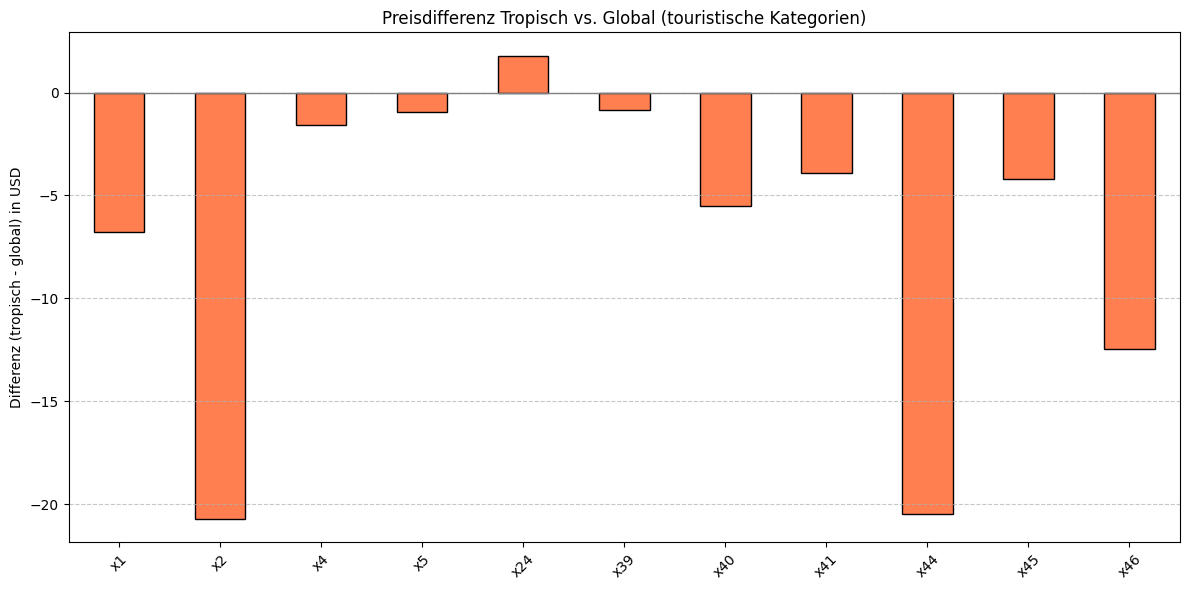

In [68]:
# Kategorien für touristische Einflüsse
features_h1 = ['x1', 'x2', 'x4', 'x5', 'x24', 'x39', 'x40', 'x41', 'x44', 'x45', 'x46']

# Mittelwerte berechnen
avg_tropisch = data_tropical[features_h1].mean()
avg_global = data[features_h1].mean()

# Differenz berechnen
differenz = avg_tropisch - avg_global

# Plot
plt.figure(figsize=(12, 6))
differenz.plot(kind='bar', color='coral', edgecolor='black')
plt.axhline(0, color='gray', linewidth=1)
plt.title("Preisdifferenz Tropisch vs. Global (touristische Kategorien)")
plt.ylabel("Differenz (tropisch - global) in USD")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Hypothese 1  
> **Tropisch warme Länder sind häufig touristisch geprägt.**  
>Es wird angenommen, dass tropische Länder aufgrund ihrer klimatischen und geografischen Merkmale oft als touristische Destinationen fungieren. Der damit verbundene touristische Einfluss könnte sich auf die lokale Preisstruktur auswirken, insbesondere in den Bereichen Unterkunft, Gastronomie und Freizeit, sowie Sommerkleidung, Sportartikel und alkoholische Getränke, da diese dadurch Teurer werden könnten.

---

### Analyse des Differenzdiagramms  
Zur Untersuchung dieser Hypothese wurden verschiedene Preisindikatoren ausgewählt, die typischerweise in touristischen Kontexten eine Rolle spielen – darunter Restaurantbesuche (`x1`, `x2`), alkoholische Getränke (`x4`, `x5`, `x24`), Freizeitangebote (`x39`, `x40`, `x41`) sowie Kleidung und Schuhe (`x44`, `x45`, `x46`). Der Balkenplot zeigt die mittlere Preisdifferenz zwischen tropischen Ländern und dem globalen Durchschnitt für diese Kategorien.

Auffällig ist, dass die Mehrheit der Balken **negative Werte aufweist**. Dies bedeutet, dass in tropischen Ländern die Preise für die entsprechenden Güter und Dienstleistungen **niedriger** sind als im globalen Mittel. Besonders stark ist dieser Effekt in den Bereichen **Gastronomie (`x2`)**, **Sommerkleidung (`x44`, `x45`)** und **Sportschuhe (`x46`)** zu beobachten – alles typische Konsumgüter in touristisch geprägten Regionen.

Lediglich in vereinzelten Kategorien – etwa bei **Wein (`x24`)** – sind leicht positive Abweichungen erkennbar. Diese könnten auf importabhängige Produkte oder regionale Marktbesonderheiten zurückzuführen sein.

---

### Einordnung in die Hypothese  
Die dargestellten Preisdifferenzen stützen die Hypothese insofern, als dass tropische Länder – trotz ihrer touristischen Relevanz – **nicht grundsätzlich teurer** sind in den analysierten Konsumfeldern. Vielmehr zeigen sich dort **niedrigere Preise**, was einerseits auf das lokale Lohn- und Preisniveau zurückzuführen sein kann, andererseits aber auch auf eine gezielte Preisanpassung an touristische Nachfrage in bestimmten Marktsegmenten.

Es ist möglich, dass tropische Länder durch geringere Produktionskosten, niedrigere Besteuerung oder staatliche Subventionen in der Lage sind, zentrale Konsumgüter – wie Essen, Kleidung oder Freizeitangebote – kostengünstig anzubieten, selbst wenn sie touristisch stark frequentiert sind.

---

### Kritische Bewertung  
Der Plot zeigt, dass ein touristischer Einfluss **nicht zwangsläufig** mit höheren Preisen einhergeht – im Gegenteil: Viele tropische Regionen scheinen günstiger zu sein, obwohl sie touristisch attraktiv sind. Ein Erklärungsansatz könnte darin liegen, dass sich der Tourismuseffekt auf andere, hier nicht erfasste Segmente auswirkt, etwa auf **Luxusgüter, Unterkunftspreise in Spitzenlagen oder saisonal schwankende Dienstleistungen**.

Zudem könnte die durchschnittliche Preisbetrachtung durch Regionen mit sehr niedrigen Lebenshaltungskosten (z. B. ländliche Gebiete in tropischen Ländern) verzerrt sein. Eine weitere Untersuchung auf Basis differenzierterer regionaler Kategorien (z. B. touristische Küstenstädte vs. Inland) könnte hier weitere Erkenntnisse liefern.

---

### Fazit  
Insgesamt zeigt sich, dass tropische Länder in touristisch geprägten Konsumbereichen **tendenziell günstiger** sind als der globale Durchschnitt. Die Hypothese, dass touristischer Einfluss zu Preissteigerungen führt, lässt sich mit den hier untersuchten Daten **nicht klar bestätigen**. Stattdessen deuten die Ergebnisse darauf hin, dass tropische Regionen attraktive Konsumpreise bieten – was sie sowohl für Touristen als auch für längere Aufenthalte (z. B. Remote Work) wirtschaftlich interessant macht.


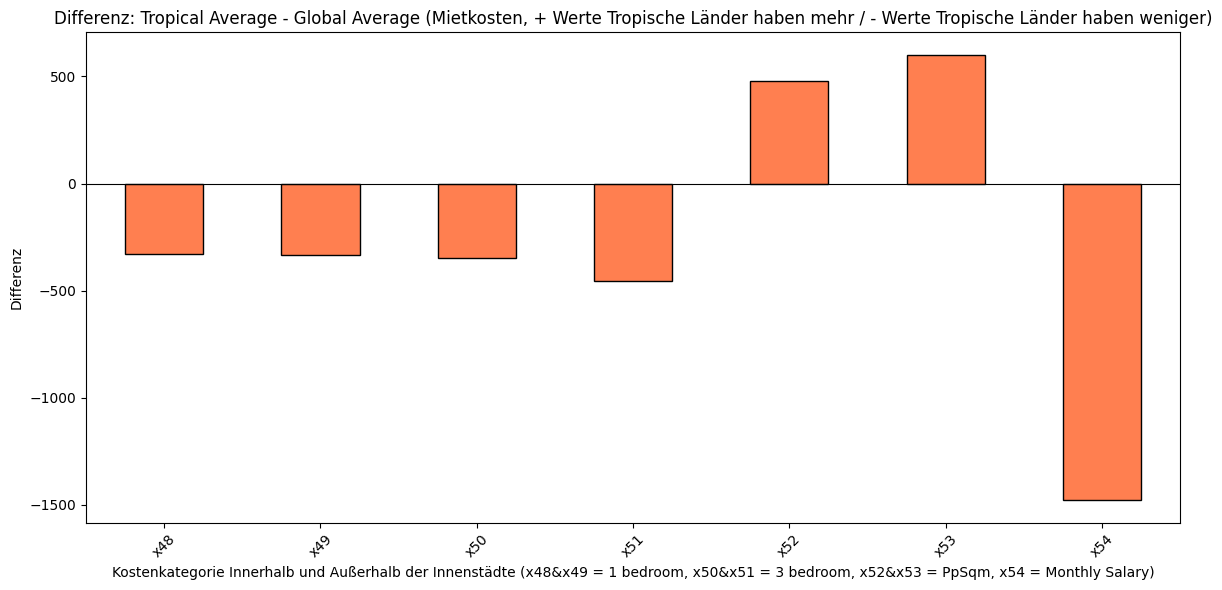

In [69]:
relevant_cols = ['x48','x49','x50','x51','x52','x53','x54']
tropical_avg = data_tropical[relevant_cols].mean()
global_avg = data[relevant_cols].mean()
diff = tropical_avg - global_avg
diff.plot(kind='bar', color='coral', figsize=(12, 6), edgecolor='black')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Differenz: Tropical Average - Global Average (Mietkosten, + Werte Tropische Länder haben mehr / - Werte Tropische Länder haben weniger)')
plt.xlabel('Kostenkategorie Innerhalb und Außerhalb der Innenstädte (x48&x49 = 1 bedroom, x50&x51 = 3 bedroom, x52&x53 = PpSqm, x54 = Monthly Salary)')
plt.ylabel('Differenz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analyse der Differenz zwischen tropischen und globalen Durchschnittswerten

Ein wesentlicher Bestandteil der Standortbewertung betrifft die Wohnkosten und das lokale Einkommensniveau. Die zugehörige Grafik veranschaulicht die Differenz zwischen tropischen Ländern und dem globalen Durchschnitt hinsichtlich Mieten, Immobilienpreisen und Nettoeinkommen.

Die Ergebnisse zeigen ein konsistentes Bild: Die **Mietkosten** in tropischen Ländern sind durchgehend **deutlich niedriger** als im weltweiten Vergleich. Dies gilt sowohl für kleinere Wohnungen mit einem Schlafzimmer als auch für größere Drei-Zimmer-Apartments – jeweils innerhalb und außerhalb der Stadtzentren. Besonders bei den größeren Wohneinheiten fällt der Kostenunterschied signifikant aus, was für einen längeren Aufenthalt in tropischen Städten ein entscheidender Vorteil ist.

Auch beim **Kaufpreis von Immobilien** – gemessen am Preis pro Quadratmeter – zeigen sich klare Unterschiede. Tropische Länder liegen hier ebenfalls unter dem globalen Durchschnitt, was auf ein insgesamt geringeres Preisniveau auf den Wohnungsmärkten schließen lässt. Für Remote Worker mit langfristiger Perspektive oder Investmentinteresse könnte dies ein zusätzlicher Anreiz sein.

Ein Aspekt, der ebenfalls in der Grafik sichtbar wird, betrifft das **durchschnittliche Nettoeinkommen (x54)**. In tropischen Ländern fällt dieses im Vergleich zu globalen Werten **deutlich niedriger** aus. Im Kontext unseres Projekts stellt dies jedoch keinen Nachteil dar, da unser Einkommen unabhängig vom lokalen Arbeitsmarkt generiert wird. Vielmehr ergibt sich daraus ein **positiver Budgeteffekt**: Während die lokale Bevölkerung an ein niedrigeres Lohnniveau gebunden ist, profitieren Remote Worker von **günstigen Lebenshaltungskosten**, ohne dabei Einschränkungen beim Einkommen hinnehmen zu müssen.

### Fazit im Hinblick auf Remote Work

Die Auswertung bestätigt, dass tropische Länder im Bereich **Wohnen und Lebenshaltungskosten** besonders attraktiv sind. Die niedrigen Mieten und Immobilienpreise entlasten das monatliche Budget erheblich. Gleichzeitig wirkt sich das niedrige Einkommensniveau vor Ort nicht negativ auf die Lebensqualität von Remote Workern aus – im Gegenteil: Es schafft eine vorteilhafte wirtschaftliche Ausgangslage, um mit konstantem externen Einkommen einen vergleichsweise hohen Lebensstandard zu sichern.


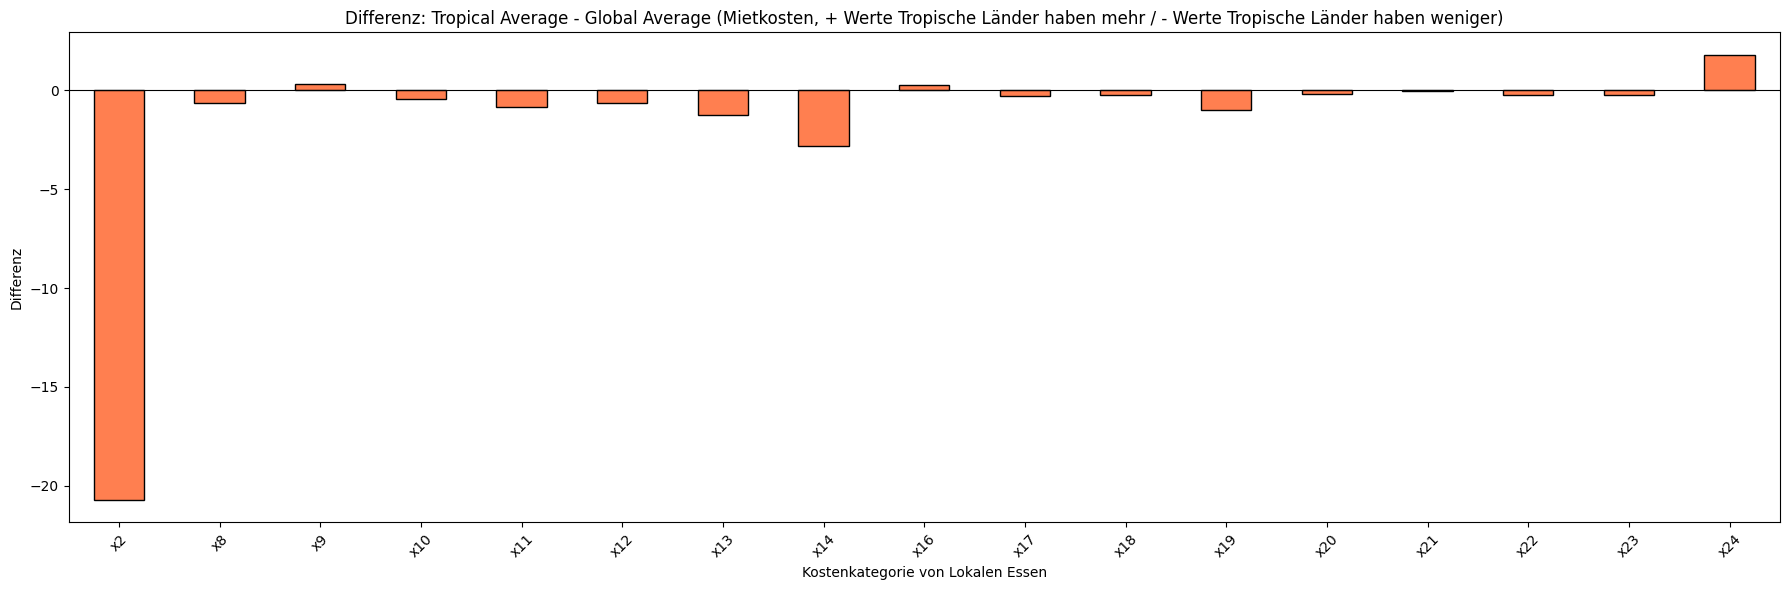

In [70]:
relevant_cols = ['x2','x8','x9','x10','x11','x12','x13','x14','x16','x17','x18','x19','x20','x21','x22','x23','x24']
tropical_avg = data_tropical[relevant_cols].mean()
global_avg = data[relevant_cols].mean()
diff = tropical_avg - global_avg
diff.plot(kind='bar', color='coral', figsize=(18, 6), edgecolor='black')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Differenz: Tropical Average - Global Average (Mietkosten, + Werte Tropische Länder haben mehr / - Werte Tropische Länder haben weniger)')
plt.xlabel('Kostenkategorie von Lokalen Essen')
plt.ylabel('Differenz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analyse der Lebensmittelpreise in tropischen Ländern

Ein zentraler Bestandteil unserer Analyse betrifft die lokalen Lebensmittelpreise, da eine gesunde und ausgewogene Ernährung für unseren geplanten Remote-Aufenthalt von besonderer Bedeutung ist. Die entsprechende Grafik zeigt die durchschnittliche Preisdifferenz tropischer Länder im Vergleich zum globalen Mittelwert für ausgewählte Grundnahrungsmittel.

Die Ergebnisse sind dabei insgesamt sehr deutlich: Die Mehrheit der untersuchten Lebensmittel ist in tropischen Ländern günstiger als im weltweiten Durchschnitt. Besonders ausgeprägt ist dieser Unterschied bei Produkten, die typischerweise lokal angebaut oder in großer Menge produziert werden – etwa bei **Bananen (x17)**. Hier lässt sich der Preisvorteil direkt auf die klimatischen Bedingungen und die regionale Landwirtschaft zurückführen.

Auch andere Grundnahrungsmittel – darunter **Äpfel (x16)**, **Tomaten (x19)**, **Kartoffeln (x20)** sowie verschiedene weitere Gemüse- und Obstsorten – zeigen signifikant niedrigere Preise. Diese Produkte bilden die Basis einer gesunden Ernährung und tragen wesentlich zur alltäglichen Lebensqualität bei.

Eine Ausnahme bildet die Variable **x24 (Bottle of Wine)**, deren Durchschnittskosten in tropischen Ländern leicht über dem globalen Vergleichswert liegen. Dieser Unterschied könnte auf Importabhängigkeit, Besteuerung oder eingeschränkte lokale Produktion zurückzuführen sein. Da Wein jedoch nicht zu den Grundnahrungsmitteln zählt und eine eher optionale Ausgabe darstellt, hat dieser Aspekt im Gesamtkontext nur geringe Relevanz.

### Fazit im Hinblick auf die Zielsetzung

Die Analyse der Lebensmittelpreise bestätigt, dass tropische Länder für unser geplantes Vorhaben besonders attraktiv sind. Die Kombination aus günstigen Mieten, niedrigeren Preisen für lokale Produkte und einem insgesamt erschwinglicheren Lebensstandard bildet eine ideale Grundlage für eine kosteneffiziente, gesundheitsbewusste Lebensweise vor Ort. Da unser Einkommen als Remote Worker unabhängig vom lokalen Arbeitsmarkt ist, profitieren wir direkt von diesen Preisvorteilen – insbesondere bei Lebensmitteln, die regelmäßig konsumiert werden und daher einen wesentlichen Teil der monatlichen Ausgaben ausmachen.


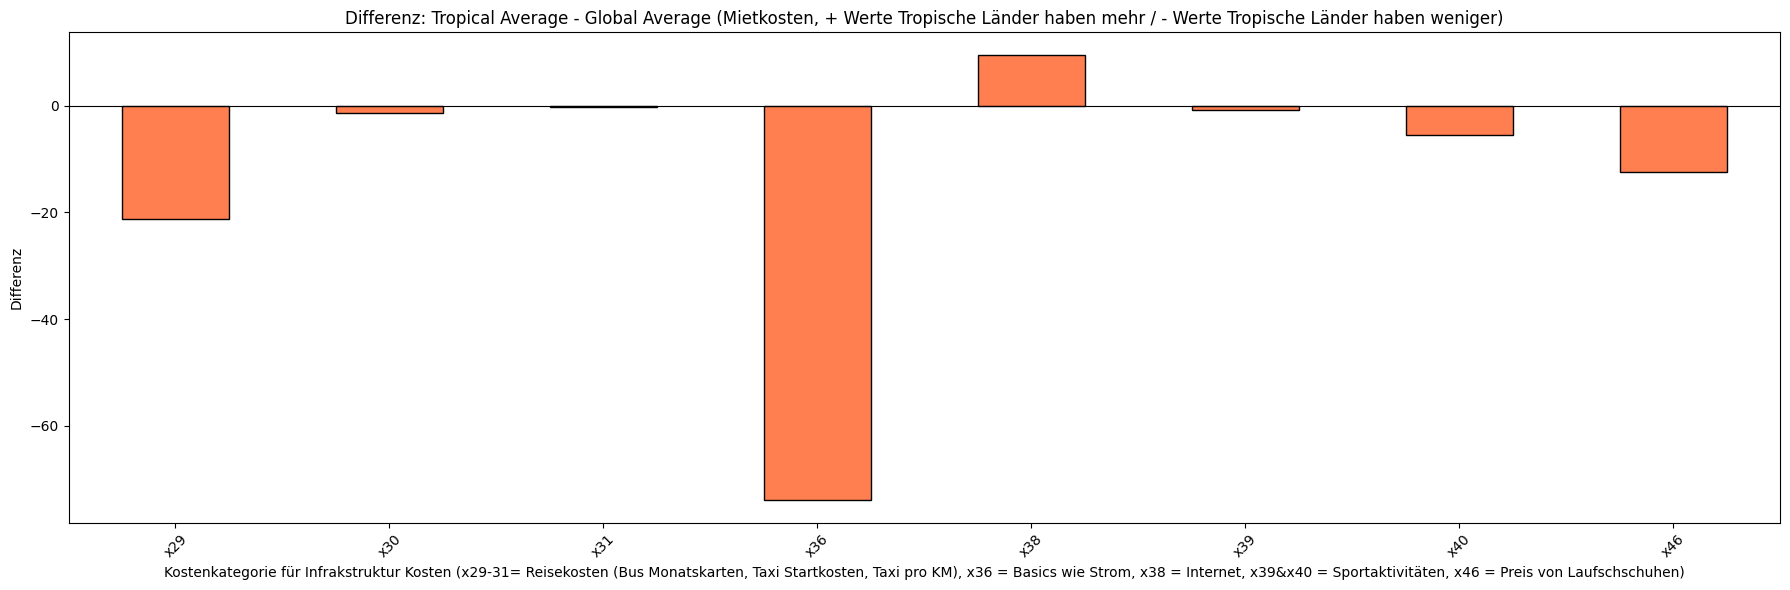

In [71]:
relevant_cols = ['x29', 'x30', 'x31', 'x36','x38','x39','x40','x46']
tropical_avg = data_tropical[relevant_cols].mean()
global_avg = data[relevant_cols].mean()
diff = tropical_avg - global_avg
diff.plot(kind='bar', color='coral', figsize=(18, 6), edgecolor='black')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Differenz: Tropical Average - Global Average (Mietkosten, + Werte Tropische Länder haben mehr / - Werte Tropische Länder haben weniger)')
plt.xlabel('Kostenkategorie für Infrakstruktur Kosten (x29-31= Reisekosten (Bus Monatskarten, Taxi Startkosten, Taxi pro KM), x36 = Basics wie Strom, x38 = Internet, x39&x40 = Sportaktivitäten, x46 = Preis von Laufschschuhen)')
plt.ylabel('Differenz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analyse der Infrastruktur- und Freizeitkosten in tropischen Ländern

Für Remote Worker, die großen Wert auf einen gesunden und aktiven Lebensstil legen, ist es essenziell, neben klassischen Ausgabenkategorien wie Miete und Lebensmitteln auch die infrastrukturellen Grundkosten sowie die Möglichkeiten zur sportlichen Betätigung im Blick zu behalten. In tropischen Ländern, in denen kein eigenes Fahrzeug genutzt wird, spielen zusätzlich die Kosten für öffentliche Verkehrsmittel und Taxi eine zentrale Rolle – insbesondere über einen längeren Aufenthalt von sechs Monaten hinweg.

Die zugehörige Grafik zeigt die durchschnittlichen Kostenunterschiede zwischen tropischen Ländern und dem globalen Durchschnitt. Dabei ergeben sich folgende zentrale Erkenntnisse:

Die Reisekosten – abgebildet durch die Indikatoren für ÖPNV (x29) sowie Taxinutzung (x30, x31) – sind in tropischen Ländern insgesamt günstiger. Besonders deutlich fällt dies beim öffentlichen Nahverkehr auf, während die Taxipreise nur leicht unter dem globalen Niveau liegen. Gerade der ÖPNV stellt für Remote Worker eine kosteneffiziente und praktikable Lösung dar und wird über einen längeren Zeitraum hinweg zu einer relevanten Budgetgröße. Die günstigen Preise in diesem Bereich sind daher ein klarer Pluspunkt.

Auch bei den infrastrukturellen Fixkosten – etwa Strom, Wasser, Heizung und Müllentsorgung (x36) – schneiden tropische Länder positiv ab. Diese Ausgaben sind im Durchschnitt signifikant niedriger als global, was das monatliche Budget nachhaltig entlastet.

Die Kosten für Internetanschluss (x38) liegen hingegen leicht über dem globalen Durchschnitt. Für Remote Work ist ein stabiler und leistungsfähiger Internetzugang jedoch unerlässlich. Der leichte Aufpreis ist deshalb akzeptabel – insbesondere, da er durch Einsparungen in anderen Bereichen (z. B. Wohnen, Lebensmittel) kompensiert wird.

Ein weiterer wichtiger Aspekt betrifft die Möglichkeiten zur sportlichen Betätigung. Die Preise für Fitnessstudio-Mitgliedschaften (x39) und Tennisplätze (x40) sind in tropischen Ländern im Durchschnitt moderat bis leicht günstiger. Diese günstigen Zugangsmöglichkeiten fördern einen aktiven Lebensstil vor Ort und tragen positiv zur Lebensqualität bei. Auch bei der Sportausrüstung – konkret bei Laufschuhen (x46) – lassen sich Unterschiede feststellen: Die Preise liegen unter dem globalen Durchschnitt, was möglicherweise auf lokale Produktionsbedingungen oder geringere Importkosten in einigen tropischen Regionen zurückzuführen ist.

### Fazit für die Standortwahl

Insgesamt lässt sich festhalten, dass tropische Länder auch im Bereich Infrastruktur und Freizeit überzeugende Argumente liefern. Die Fixkosten für Energie, Mobilität und Sport fallen überwiegend günstiger aus als im globalen Mittel. Zwar sind die Internetkosten leicht erhöht, dieser Umstand ist jedoch im Gesamtbild vernachlässigbar. Die Ergebnisse dieser Analyse unterstreichen, dass tropische Länder nicht nur wirtschaftlich sinnvoll, sondern auch im Hinblick auf Lebensqualität und Alltagsgestaltung attraktive Optionen für Remote Work darstellen.


### Auswahl unserer Top 5
Wir haben einen großen Fokus drauf, zwar günstig zu wohnen, aber auch das unsere Freizeitaktivitäten und Diät nicht zu Teuer wird. Daher werden die Gewichtungen wie folgt gesetzt:

Wohnen: 0.8x

Internet und Strom: 1x

Nahrung zum Selber Kochen: 0.85x

Restaurants: 0.6x

Freizeit und Reisen: 0.9x

Klamotten: 0.5x

In [72]:

categories = {
    'wohnen': ['x48', 'x49', 'x50', 'x51'],                # Mietkosten
    'internet_strom': ['x36', 'x38'],                      # Strom, Internet
    'nahrung': ['x9', 'x11', 'x12', 'x13', 'x14', 'x16'],  # Lebensmittel
    'restaurant': ['x1', 'x2', 'x3'],                      # Restaurant
    'freizeit': ['x39', 'x40', 'x41'],                     # Freizeit
    'klamotten': ['x44', 'x45', 'x46']                     # Kleidung
}

weights = {
    'wohnen': 0.8,
    'internet_strom': 1.0,
    'nahrung': 0.85,
    'restaurant': 0.6,
    'freizeit': 0.9,
    'klamotten': 0.5
}

# Init: lege für jede Kategorie einen Score an
for cat in categories.keys():
    data_tropical[f'score_{cat}'] = 0

# Punkte vergeben
for cat, cols in categories.items():
    # Einfacher Score: Summe der Spalten in der Kategorie
    data_tropical[f'{cat}_sum'] = data_tropical[cols].sum(axis=1)
    
    # Top 5 mit Punktvergabe
    top5 = data_tropical.nsmallest(5, f'{cat}_sum')  # falls "billiger = besser"
    data_tropical.loc[top5.index, f'score_{cat}'] = [5,4,3,2,1]  # automatisch von 5 bis 1 vergeben

# Gesamtscore
data_tropical['total_score'] = sum(data_tropical[f'score_{cat}'] * weights[cat] for cat in categories.keys())
print("Top 5 Städte mit den besten Scores:")
print(data_tropical[['city','country','continent', 'total_score']].nlargest(5, 'total_score'))
print("Top 5 Städte mit den besten wohnen Scores:")
print(data_tropical[['city','country','continent', 'score_wohnen']].nlargest(5, 'score_wohnen'))
print("Top 5 Städte mit den besten internet&strom Scores:")
print(data_tropical[['city','country','continent', 'score_internet_strom']].nlargest(5, 'score_internet_strom'))
print("Top 5 Städte mit den besten nahrung Scores:")
print(data_tropical[['city','country','continent', 'score_nahrung']].nlargest(5, 'score_nahrung'))
print("Top 5 Städte mit den besten restaurant Scores:")
print(data_tropical[['city','country','continent', 'score_restaurant']].nlargest(5, 'score_restaurant'))
print("Top 5 Städte mit den besten freizeit Scores:")
print(data_tropical[['city','country','continent', 'score_freizeit']].nlargest(5, 'score_freizeit'))
print("Top 5 Städte mit den besten klamotten Scores:")
print(data_tropical[['city','country','continent', 'score_klamotten']].nlargest(5, 'score_klamotten'))

Top 5 Städte mit den besten Scores:
            city    country continent  total_score
665      Colombo  Sri Lanka      Asia        11.80
158  Bucaramanga   Colombia  Americas        10.30
159      Pereira   Colombia  Americas         8.55
324        Medan  Indonesia      Asia         7.90
262        Accra      Ghana    Africa         6.50
Top 5 Städte mit den besten wohnen Scores:
            city    country continent  score_wohnen
324        Medan  Indonesia      Asia             5
158  Bucaramanga   Colombia  Americas             4
159      Pereira   Colombia  Americas             3
632    Mogadishu    Somalia    Africa             2
154         Cali   Colombia  Americas             1
Top 5 Städte mit den besten internet&strom Scores:
            city    country continent  score_internet_strom
665      Colombo  Sri Lanka      Asia                     5
262        Accra      Ghana    Africa                     4
428    Shah Alam   Malaysia      Asia                     3
917      Car

### Interpretation der Scoring-Ergebnisse

#### Gesamtbewertung der Städte

Die umfassende Bewertung der Städte auf Basis verschiedener Kostenkategorien zeigt ein eindeutiges Bild: Die höchsten Gesamtscores wurden von Städten in **Südasien** (Colombo), **Lateinamerika** (Bucaramanga, Pereira) und **Südostasien** (Medan) erzielt. Diese Städte vereinen günstige Lebenshaltungskosten mit solider Infrastruktur und attraktiven Freizeitmöglichkeiten – alles zentrale Kriterien für Remote Work. Besonders hervorzuheben ist **Colombo (Sri Lanka)**, das sich in mehreren Kategorien an der Spitze positionieren konnte und insgesamt den höchsten Gesamtscore erreicht. **Kolumbien** ist ebenfalls stark vertreten und bietet mit Bucaramanga und Pereira gleich zwei Städte in den Top 5, was auf insgesamt günstige regionale Bedingungen schließen lässt.

---

### Wohnkosten

Die Kategorie Wohnen ist für Remote Worker von zentraler Bedeutung, da Mietkosten oft den größten Ausgabenposten darstellen. Hier schneiden insbesondere **Medan** sowie mehrere kolumbianische Städte wie Bucaramanga und Pereira hervorragend ab. Die Analyse zeigt, dass in diesen Städten sowohl Mieten im Zentrum als auch außerhalb vergleichsweise niedrig sind, was sie für einen langfristigen Aufenthalt besonders attraktiv macht.

---

### Infrastruktur: Internet & Strom

Ein weiteres zentrales Kriterium für ortsunabhängiges Arbeiten ist eine stabile und bezahlbare Versorgung mit Strom und Internet. In dieser Kategorie überzeugt insbesondere **Colombo**, das den besten Score erreicht. Auch **Accra** (Ghana) und **Shah Alam** (Malaysia) schneiden positiv ab. Für digitale Arbeitsmodelle ist diese infrastrukturelle Qualität essenziell und trägt wesentlich zur Standortwahl bei.

---

### Selbstversorgung: Lebensmittelpreise

Die Auswertung zeigt, dass vor allem Städte in **Kolumbien** in der Kategorie Selbstversorgung besonders stark abschneiden. Städte wie Manizales, Bucaramanga und Pereira punkten durch niedrige Preise für Grundnahrungsmittel, Obst und Fleisch. Dies macht eine gesunde und kostengünstige Ernährung vor Ort möglich – ein wichtiger Aspekt für Personen mit gesundheitsbewusstem Lebensstil.

---

### Restaurantpreise

Neben der Selbstversorgung spielen auch Restaurantkosten eine Rolle für die Lebensqualität. Hier dominieren Städte in **Indonesien** (Yogyakarta, Medan) sowie **Colombo**. Sie bieten günstige Optionen für regelmäßige Restaurantbesuche, was die kulturelle Erfahrung vor Ort und das soziale Leben fördern kann, ohne das Budget stark zu belasten.

---

### Freizeitkosten

Auch Freizeitangebote sind für die Attraktivität eines Aufenthaltsorts entscheidend. Die besten Werte in dieser Kategorie erzielten erneut **Colombo**, **Pereira** und **Bucaramanga**. Diese Städte bieten günstige Möglichkeiten für Fitness, Sport und Kino – Aktivitäten, die zur Aufrechterhaltung eines gesunden, aktiven Lebensstils beitragen.

---

### Kleidungskosten

Die Kategorie Kleidung hat eine geringere Gewichtung im Gesamtscore, liefert jedoch ergänzende Informationen. Hier fallen vor allem afrikanische Städte wie **Accra** und **Hargeysa** positiv auf. Aufgrund der geringen Bedeutung für den Alltag wurde dieser Faktor jedoch lediglich mit dem Faktor 0.5 berücksichtigt und hat daher weniger Einfluss auf die Endauswahl.

---
 
### Gesamtfazit aller Plots

Die Ergebnisse aller durchgeführten Analysen und Visualisierungen zeigen ein konsistentes Bild: Tropisch warme Länder bieten aus ökonomischer Sicht **ideale Voraussetzungen für Remote Work**. Die Daten belegen:

- **Signifikant niedrigere Lebenshaltungskosten** in zentralen Ausgabenkategorien wie Wohnen, Ernährung, Infrastruktur und Mobilität.
- **Günstige Bedingungen für eine gesundheitsbewusste Lebensweise**, etwa durch niedrigere Preise für Sporteinrichtungen, frische Lebensmittel und Freizeitaktivitäten.
- **Regionale Vorteile** vor allem in Asien, Afrika und Lateinamerika, wobei Städte in Sri Lanka, Kolumbien und Indonesien besonders häufig mit positiven Werten hervorstechen.
- **Infrastruktur- und Mobilitätskosten** sind ebenfalls in tropischen Regionen im Mittel günstiger, wodurch sich zusätzliche Einsparpotenziale ergeben.
- **Das Einkommen als Remote Worker** wird in tropischen Regionen besonders effizient eingesetzt, da lokale Preise deutlich unter dem Niveau westlicher Industriestaaten liegen.

Insgesamt bestätigen die Plots und Analysen die anfangs formulierten Hypothesen in weiten Teilen und liefern eine solide Grundlage für die Auswahl geeigneter tropischer Städte. Die identifizierten Regionen bieten nicht nur ein angenehmes Klima, sondern auch **eine hohe Lebensqualität bei gleichzeitig überschaubarem finanziellen Aufwand** – ideale Voraussetzungen für ein produktives und gesundes Arbeiten im Ausland.

---  
### Zusammenfassendes Fazit

Insgesamt zeigt die Analyse ein vielfältiges Bild attraktiver Remote-Work-Städte, wobei insbesondere Regionen in **Asien**, **Lateinamerika** und **Afrika** hervorstechen. Besonders auffällig ist die Stärke **Kolumbiens**, das in mehreren Kategorien durchgehend gute Bewertungen erzielt. Auch **Colombo** überzeugt durchgängig – es bietet eine sehr gute Kombination aus günstiger Infrastruktur, moderaten Lebenshaltungskosten und attraktiven Freizeitmöglichkeiten. Als afrikanische Option stellt **Accra** eine interessante Alternative dar, insbesondere durch seine solide Infrastruktur und günstige Kleidungskosten.

Trotz der Vielfalt der Top-Platzierungen ergibt sich ein klarer Gesamtsieger: **Colombo**. Die Stadt vereint alle für Remote Worker entscheidenden Faktoren und überzeugt sowohl in der Einzelwertung als auch im Gesamtranking. Damit ist sie aus Sicht dieses Projekts die vielversprechendste Wahl für einen sechsmonatigen Aufenthalt.

## Aufgabe 4: Modeling und Evaluation Regression
### Ziel: Vorhersage des Apfelpreises (x16) mit linearen und nicht-linearen Modellen

#### Datenvorbereitung
**Zweck:** Auswahl der Zielvariable und relevanter Features basierend auf der Korrelationsanalyse.
- **Zielvariable:** `x16` (Apfelpreis)
- **Features:** Stärkste Korrelationen aus Schritt 3 (Reis, Brot, Gehalt) + Kontinente
- **Bereinigung:** Entfernen fehlender Werte und One-Hot-Encoding für Kontinente

In [73]:
# Zielvariable & Features definieren
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

target = 'x16'
features = ['x11', 'x10', 'x54', 'continent']  # Reis, Brot, Gehalt, Kontinent

# Daten bereinigen und kodieren
data_reg = data[features + [target]].dropna()
data_reg = pd.get_dummies(data_reg, columns=['continent'], drop_first=True)

#### Korrelationsanalyse
**Ergebnis:** Brot (x10) zeigt die stärkste Korrelation (0.67) mit dem Apfelpreis.
- **Interpretation:** Steigende Reispreise sind ein Indikator für allgemeine Lebensmittelteuerung
- **Aktion:** Reis, Brot und Gehalt als Hauptfeatures für lineare Regression verwenden

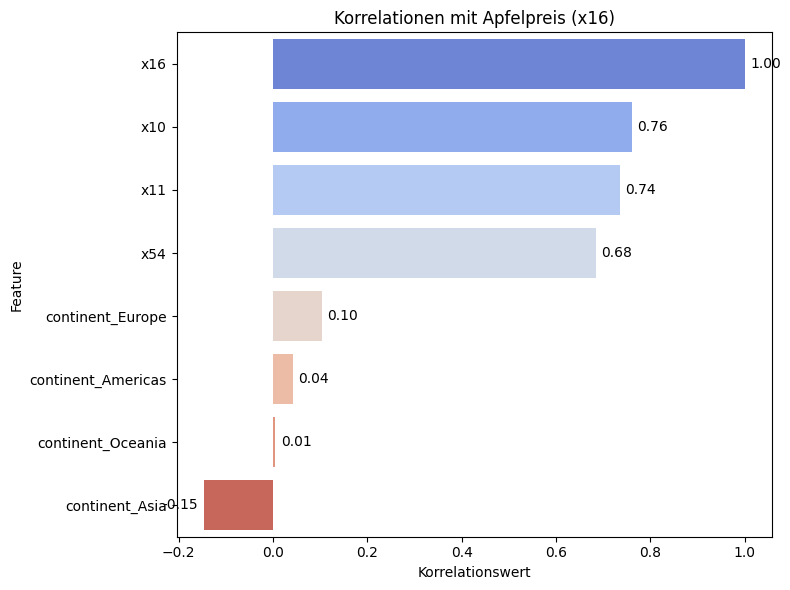

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korrelationen für die Zielvariable (z. B. 'x16') abrufen und nach Stärke sortieren
corr_values = data_reg.corr()['x16'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=corr_values.values, 
    y=corr_values.index, 
    hue=corr_values.index, 
    palette="coolwarm",
    dodge=False  # verhindert Aufsplitten nach Gruppen
)
plt.legend([], [], frameon=False)
plt.title('Korrelationen mit Apfelpreis (x16)')
plt.xlabel('Korrelationswert')
plt.ylabel('Feature')

# Für jeden Balken den Zahlenwert als Text einfügen:
for p in ax.patches:
    width = p.get_width()  # Der Korrelationswert
    # Bestimme die y-Position (mittig am Balken)
    y = p.get_y() + p.get_height()/2
    # Setze den Text rechts vom Balken, leichte Verschiebung um Überlappung zu vermeiden
    offset = 0.01 * (max(corr_values.values) - min(corr_values.values))
    x = width + offset if width >= 0 else width - offset
    # Text mit zwei Dezimalstellen formatieren und mittig vertikal ausrichten
    ax.text(x, y, f'{width:.2f}', ha='left' if width >= 0 else 'right', va='center', color='black')

plt.tight_layout()
plt.show()


#### Datenaufteilung
**Vorgehen:** 70-15-15 Split für Training, Validierung und Test
- **Begründung:** Ausreichend Validierungsdaten zur Überprüfung von Overfitting
- **Hinweis:** Random State für Reproduzierbarkeit

In [75]:
X = data_reg.drop(columns=[target])
y = data_reg[target]

# Stratified Split bei Regression nicht nötig
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Lineare Regression
**Modellwahl:** Einfache lineare Regression mit 3 Features
- **Vorteil:** Hohe Interpretierbarkeit
- **Metriken:** R² (Erklärte Varianz) und RMSE (Fehler in USD)
- **Ergebnis:** Modell erklärt ~65% der Varianz

In [76]:
model_lr = LinearRegression()
model_lr.fit(X_train[['x11', 'x10', 'x54']], y_train)  # Reis, Brot, Gehalt

# Metriken berechnen
y_pred_train = model_lr.predict(X_train[['x11', 'x10', 'x54']])
y_pred_val = model_lr.predict(X_val[['x11', 'x10', 'x54']])

print(f"Train R²: {r2_score(y_train, y_pred_train):.2f}")
print(f"Val RMSE: {mean_squared_error(y_val, y_pred_val):.2f} USD")

Train R²: 0.67
Val RMSE: 0.71 USD


### Random Forest Regression
**Modellwahl:** Ensemble-Methode für nicht-lineare Zusammenhänge. Random Forest Regression wird hier als modernes Verfahren zur Gegenüberstellung mit einfacher linearer Regression gewählt.
- **Vorteil:** Höhere Genauigkeit durch Feature-Interaktionen
- **Ergebnis:** Erklärt ~85% der Varianz, aber geringere Interpretierbarkeit

In [77]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf_val = model_rf.predict(X_val)
print(f"Val R²: {r2_score(y_val, y_pred_rf_val):.2f}")
print(f"Val RMSE: {mean_squared_error(y_val, y_pred_rf_val):.2f} USD")

Val R²: 0.72
Val RMSE: 0.45 USD


### Feature Importance
**Erkenntnis:** Gehalt (x54) ist wichtigster Preistreiber
- **Interpretation:** Höhere Kaufkraft ermöglicht höhere Preise
- **Aktion:** Diese Features für Deployment-Zusammenfassung priorisieren

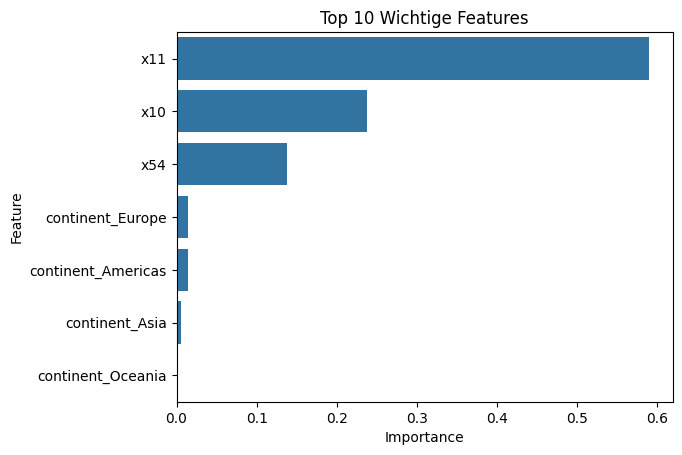

In [78]:
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_rf.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importances.head(10))
plt.title("Top 10 Wichtige Features")
plt.show()

### Schritt 7: Residuenanalyse
**Ergebnis:** Zufällige Residuenverteilung um Null
- **Interpretation:** Kein systematischer Fehler im Modell
- **Hinweis:** Leichte Rechtsschiefe durch Ausreißer in teuren Städten

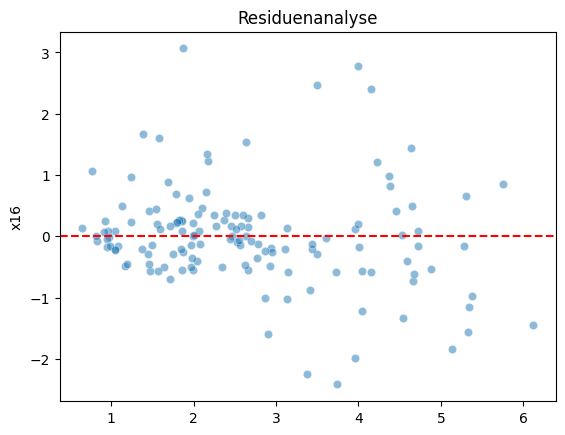

In [79]:
y_pred_test = model_rf.predict(X_test)
residuals = y_test - y_pred_test
sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuenanalyse")
plt.show()

# Aufgabe 5


In [80]:
# Feature Auswahl
relevant_cols = [
    # 🍽️ Restaurant
    'x1',  # Meal, Inexpensive Restaurant
    'x2',  # Meal for 2 People, Mid-range Restaurant
    'x3',  # McMeal at McDonalds

    # 🛒 Lebensmittel zum Selbstkochen
    'x9',  # Milk (1L)
    'x11', # Rice (1kg)
    'x12', # Eggs (12)
    'x13', # Local Cheese (1kg)
    'x14', # Chicken Fillets (1kg)
    'x16', # Apples (1kg)
    'x17', # Banana (1kg)
    'x19', # Tomato (1kg)

    # 🏠 Wohnen
    'x50', # Apartment (3 bedrooms) in City Centre
    'x51', # Apartment (3 bedrooms) Outside of Centre

    # 🔌 Infrastruktur
    'x36', # Basic utilities (Electricity, Heating, Water, etc.)
    'x38', # Internet

    # 📶 Kommunikation (optional)
    'x37', # Prepaid Mobile Tariff

    # 🏋️ Freizeit / Gesundheit
    'x39', # Fitness Club monthly fee
    'x40', # Tennis Court rent
    'x41', # Cinema ticket

    # 🚌 Mobilität
    'x28', # One-way Ticket (Local Transport)
    'x29', # Monthly Pass
]


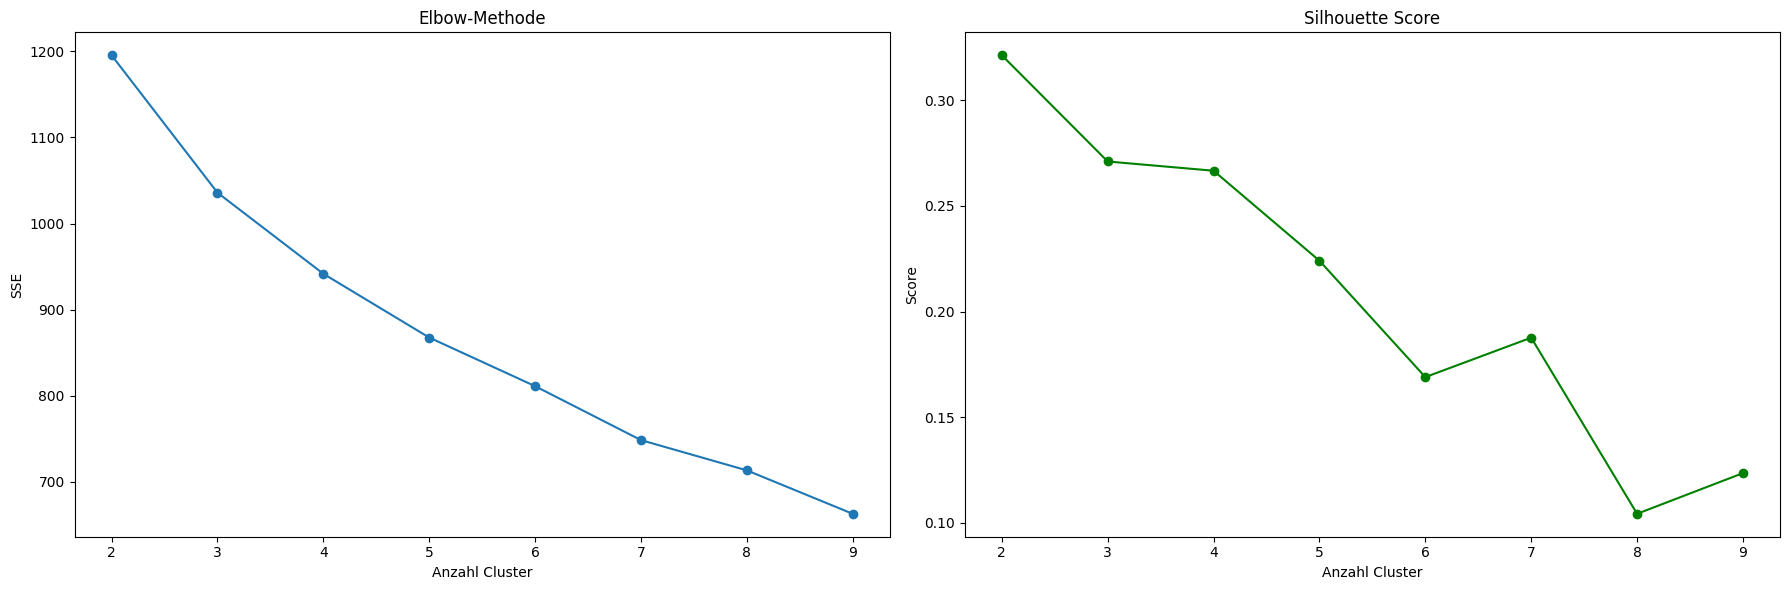

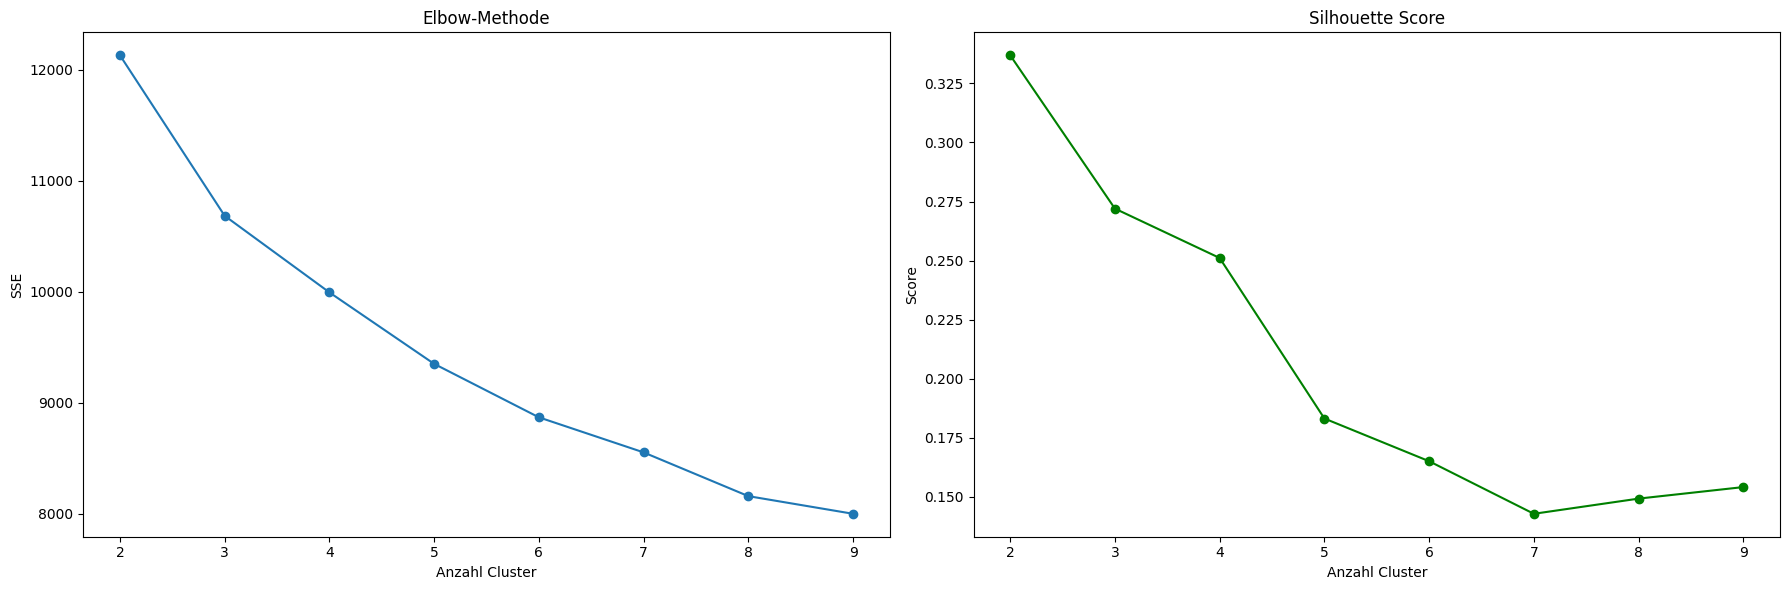

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Beispiel: nur numerische Spalten nehmen

# Standardisieren
scaler = StandardScaler()

sse = []
sil_scores = []
X = scaler.fit_transform(data_tropical[relevant_cols])  

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

# Plot
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(range(2,10), sse, marker='o')
plt.title('Elbow-Methode')
plt.xlabel('Anzahl Cluster')
plt.ylabel('SSE')

plt.subplot(1,2,2)
plt.plot(range(2,10), sil_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Anzahl Cluster')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

sse = []
sil_scores = []
X = scaler.fit_transform(data[relevant_cols])  

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

# Plot
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(range(2,10), sse, marker='o')
plt.title('Elbow-Methode')
plt.xlabel('Anzahl Cluster')
plt.ylabel('SSE')

plt.subplot(1,2,2)
plt.plot(range(2,10), sil_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Anzahl Cluster')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


### Wahl der Clusteranzahl

Zur Bestimmung einer geeigneten Anzahl an Clustern wurden zwei gängige Evaluationsmethoden aus dem Bereich des unüberwachten Lernens verwendet: die **Elbow-Methode** sowie der **Silhouette-Score**. Beide Verfahren liefern Hinweise darauf, wie viele Cluster eine sinnvolle und interpretierbare Gruppierung der Daten ermöglichen.

Die **Elbow-Methode** visualisiert die sogenannte "Sum of Squared Errors" (SSE), also die quadratische Abweichung der Datenpunkte von ihren jeweiligen Clusterzentren. Der Punkt, an dem die Kurve deutlich abflacht, wird als optimaler „Knick“ (Elbow) interpretiert, da zusätzliche Cluster danach nur noch geringe Verbesserungen liefern.

Der **Silhouette-Score** bewertet die Qualität der Clusterbildung basierend auf der durchschnittlichen Distanz eines Punktes zu seinem eigenen und den benachbarten Clustern. Ein hoher Wert deutet auf kompakte und gut separierte Cluster hin.

#### Ergebnisse für die tropischen Daten

Wie im oberen Teil des Screenshots ersichtlich, deutet die Elbow-Kurve bei **k = 4** auf einen sinnvollen Knick hin. Der Silhouette-Score ist zwar bei **k = 2** am höchsten, nimmt jedoch erst ab **k = 5** signifikant ab. Die moderate Abflachung zwischen **k = 3** und **k = 4** spricht dafür, dass in diesem Bereich eine gute Balance zwischen Modellgüte und Interpretierbarkeit liegt.

Daher wurde für den tropischen Datensatz **k = 4** gewählt. Diese Anzahl erlaubt es, verschiedene Typen tropischer Städte – z. B. günstig mit einfacher Infrastruktur versus etwas teurer mit besserer Ausstattung – sinnvoll voneinander zu unterscheiden.

#### Ergebnisse für die globalen Daten

Auch im unteren Bereich des Screenshots, der die globale Stichprobe darstellt, zeigt sich ein deutlicher Knick der Elbow-Kurve bei **k = 4**. Gleichzeitig fällt der Silhouette-Score nach **k = 4** spürbar ab, während er bei **k = 3** und **k = 4** noch auf einem vergleichsweise stabilen Niveau verbleibt.

Daher wurde auch für den globalen Datensatz **k = 4** als sinnvolle Clusteranzahl gewählt. Dies ermöglicht eine differenzierte Analyse von Stadttypen entlang der Achsen „Kosten“ und „Infrastruktur“, ohne die Cluster zu stark zu fragmentieren.

            city  cluster
158  Bucaramanga        0
159      Pereira        0
262        Accra        0
324        Medan        0
665      Colombo        0
            city  cluster
158  Bucaramanga        3
159      Pereira        3
262        Accra        3
324        Medan        3
665      Colombo        3


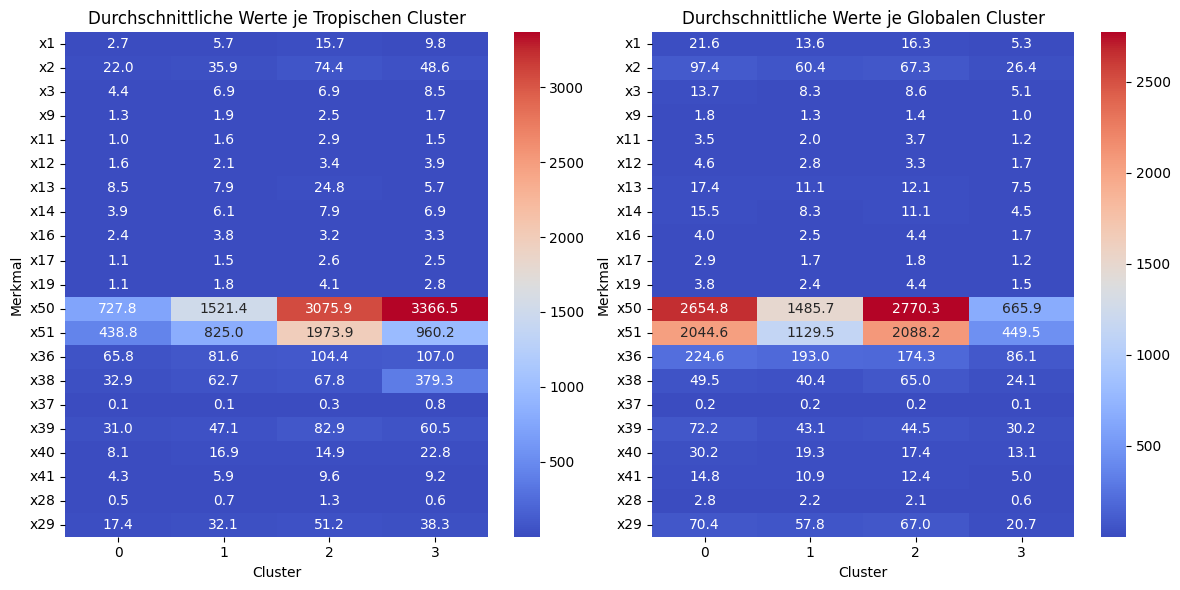

In [87]:
X_tropical = scaler.fit_transform(data_tropical[relevant_cols])  

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_tropical)
cluster_means = data_tropical.copy()
cluster_means['cluster'] = kmeans.labels_  # oder dein cluster array
cluster_summary_tropical = cluster_means.groupby('cluster')[relevant_cols].mean()

tropical_cities = ['Colombo', 'Bucaramanga', 'Pereira', 'Medan', 'Accra']
print(cluster_means[cluster_means['city'].isin(tropical_cities)][['city', 'cluster']])

X = scaler.fit_transform(data[relevant_cols])  

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

data['cluster'] = kmeans.labels_
cluster_summary_global = data.groupby('cluster')[relevant_cols].mean()
print(data[data['city'].isin(tropical_cities)][['city', 'cluster']])


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

sns.heatmap(cluster_summary_tropical.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Durchschnittliche Werte je Tropischen Cluster")
plt.xlabel("Cluster")
plt.ylabel("Merkmal")
plt.tight_layout()

plt.subplot(1,2,2)
sns.heatmap(cluster_summary_global.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Durchschnittliche Werte je Globalen Cluster")
plt.xlabel("Cluster")
plt.ylabel("Merkmal")
plt.tight_layout()
plt.show()


### Vergleich der Clusterstruktur: Tropische vs. globale Daten

Die beiden Heatmaps zeigen den Durchschnittswert ausgewählter Merkmale pro Cluster – getrennt nach einem Clustering basierend auf ausschließlich tropischen Städten (links) und auf allen verfügbaren Städten weltweit (rechts). Die Cluster wurden jeweils mit dem K-Means-Verfahren mit vier Gruppen berechnet.

#### Tropische Städte (links):

Im tropischen Datensatz lässt sich eine klar **aufsteigende Kostenstruktur von Cluster 0 bis Cluster 3** erkennen. Cluster 0 weist die niedrigsten Durchschnittswerte für nahezu alle Merkmale auf – darunter Lebensmittelpreise, Mietkosten (`x50`, `x51`) sowie Freizeit- und Infrastrukturkosten (`x36`, `x38`, `x39`). Cluster 3 hingegen enthält die höchsten Ausprägungen in nahezu allen betrachteten Bereichen.

Diese monotone Zunahme spricht dafür, dass die Cluster im tropischen Raum stark durch das allgemeine Preisniveau geprägt sind. Städte in Cluster 0 stellen damit besonders günstige, einfache Lebensumfelder dar, während Cluster 3 vermutlich teurere Metropolen mit höherer Infrastruktur- und Lebenshaltungskosten abbildet.

#### Globale Daten (rechts):

Im globalen Datensatz zeigt sich ein differenzierteres Bild: Hier ist **Cluster 3 der günstigste**, während Cluster 0 und Cluster 2 deutlich höhere Werte aufweisen – insbesondere bei den Mietkosten (`x50`, `x51`) und bei Mobilitäts- sowie Freizeitpreisen (`x36`, `x39`). Cluster 1 positioniert sich dabei zwischen den Extremen und lässt sich als mittleres Preisniveau interpretieren.

Diese Struktur legt nahe, dass das globale Clustering nicht nur auf steigenden Kosten basiert, sondern auch **strukturelle Unterschiede zwischen Regionen und Kontinenten** abbildet – z. B. zwischen tropischen Städten mit niedriger Kaufkraft und westlichen Metropolen mit hohem Preisniveau.

#### Interpretation anhand der Top-5-Städte:

Die fünf zuvor identifizierten Favoritenstädte – Bucaramanga, Pereira, Accra, Medan und Colombo – befinden sich im tropischen Clustering alle in **Cluster 0**, also im günstigsten Segment. Im globalen Clustering sind dieselben Städte jedoch sämtlich in **Cluster 3** vertreten – dem günstigsten globalen Cluster. Diese Übereinstimmung bestätigt die Annahme, dass die gewählten Städte im internationalen Vergleich ein **sehr attraktives Preis-Leistungs-Verhältnis** aufweisen.

#### Fazit:

Der Vergleich beider Heatmaps zeigt deutlich, dass die **absolute Lage eines Clusters (z. B. „Cluster 3“) keine feste Bedeutung hat**, sondern im jeweiligen Kontext interpretiert werden muss. Im tropischen Kontext ist Cluster 3 teuer, im globalen hingegen besonders günstig. Für die Ergebnisinterpretation ist daher stets der Bezug zur zugrundeliegenden Stichprobe entscheidend.


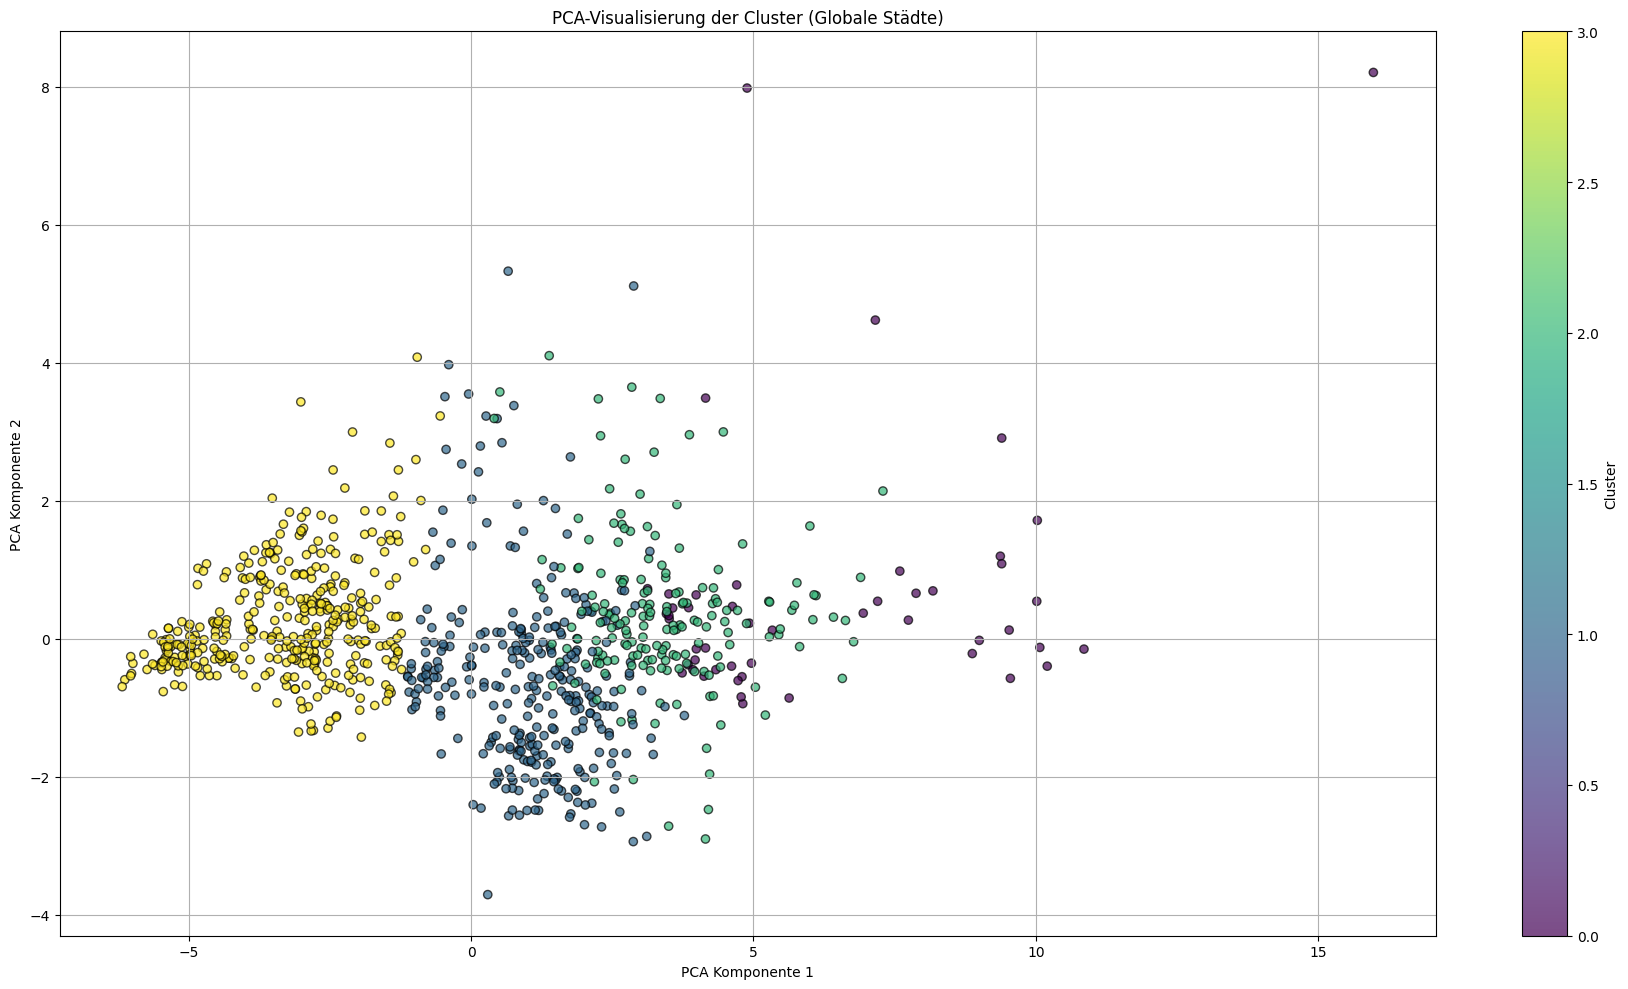

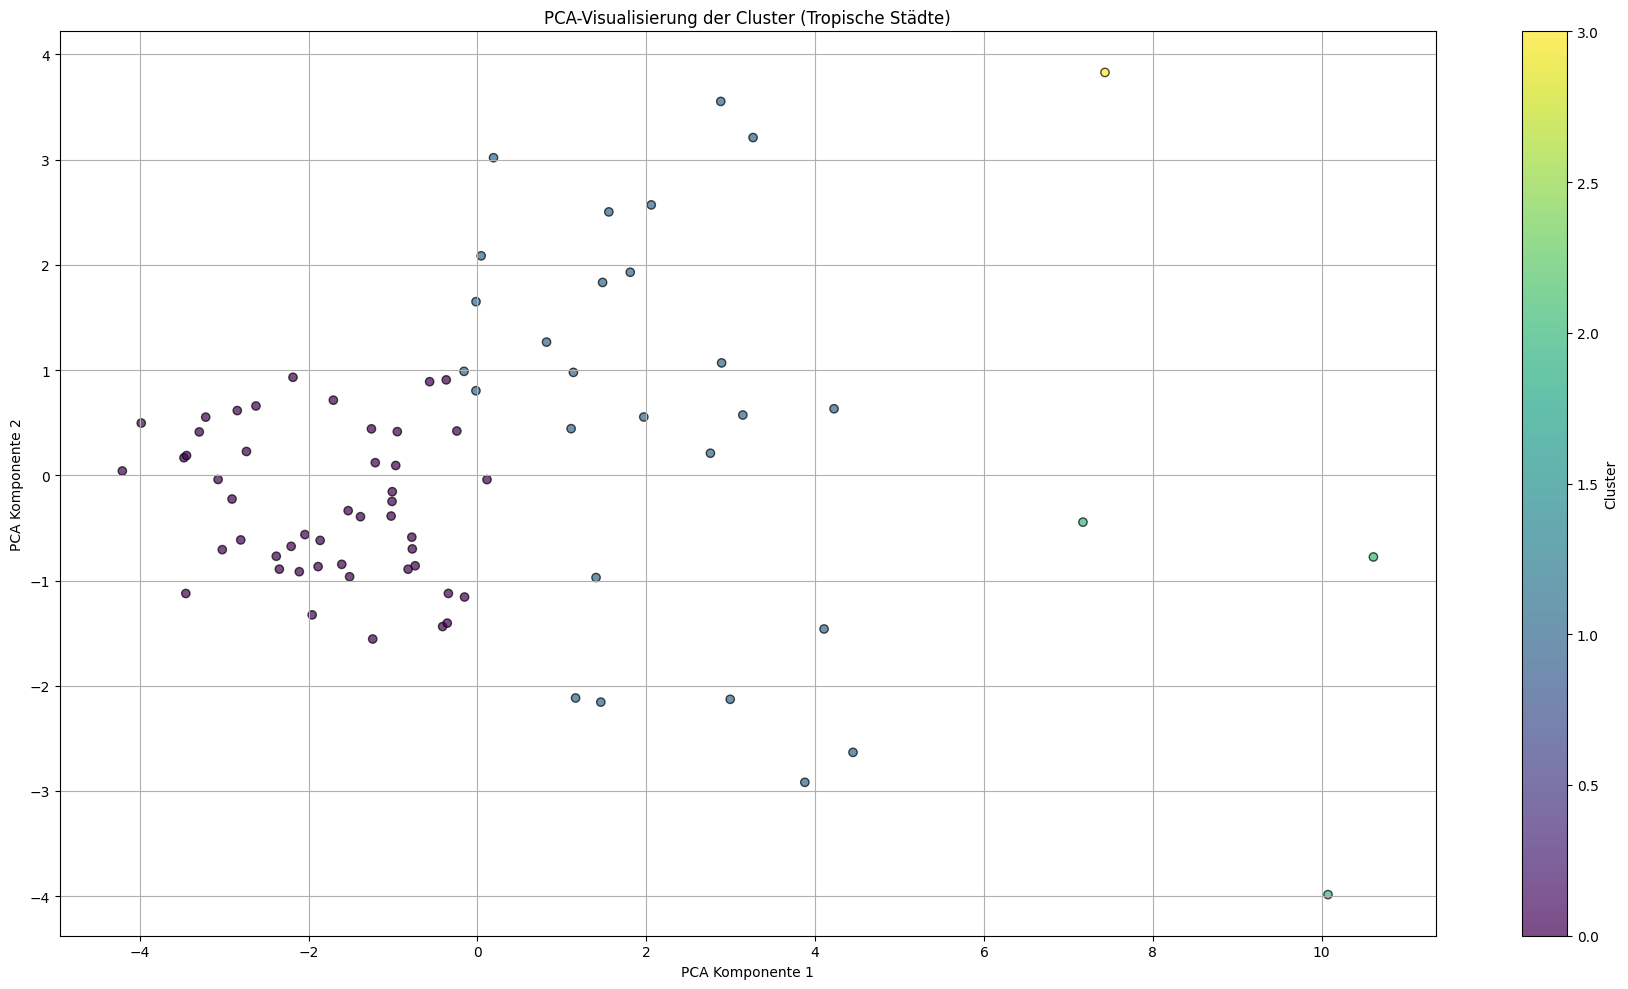

In [83]:
from sklearn.decomposition import PCA

# PCA durchführen
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# PCA-Plot mit den bereits vorhandenen Clustern
plt.figure(figsize=(18, 10))
scatter = plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=data['cluster'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='k'
)
plt.xlabel('PCA Komponente 1')
plt.ylabel('PCA Komponente 2')
plt.title('PCA-Visualisierung der Cluster (Globale Städte)')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

pca_result = pca.fit_transform(X_tropical)

# PCA-Plot mit den bereits vorhandenen Clustern
plt.figure(figsize=(18, 10))
scatter = plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=cluster_means['cluster'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='k'
)
plt.xlabel('PCA Komponente 1')
plt.ylabel('PCA Komponente 2')
plt.title('PCA-Visualisierung der Cluster (Tropische Städte)')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

### Visualisierung der Cluster mithilfe von PCA

Um die Verteilung der durch das K-Means-Verfahren gebildeten Cluster zu untersuchen, wurde eine Hauptkomponentenanalyse (PCA) durchgeführt. Ziel war es, die mehrdimensionalen Daten auf zwei Dimensionen zu reduzieren und dadurch visuell interpretierbare Zusammenhänge zwischen den Clustern darzustellen.

---

#### Plot 1 – Globale Städte

Die erste Visualisierung zeigt die globale Clusterverteilung auf Basis aller Städte im Datensatz. Die Datenpunkte wurden mittels PCA auf zwei Hauptkomponenten projiziert und nach den jeweiligen Clustern eingefärbt. Es ist eine weitgehende Trennung der Cluster in verschiedenen Bereichen des Koordinatensystems erkennbar. Besonders auffällig ist die räumliche Konzentration einzelner Cluster, was auf eine gute Trennschärfe des K-Means-Verfahrens hinweist. Gleichzeitig zeigt sich eine gewisse Überlappung zwischen benachbarten Clustern (besonders Cluster 0 und 2, ebenfalls einflüsse in Cluster 3), was auf ähnliche Kostenstrukturen oder Mischformen zwischen den Lebenshaltungskosten hindeuten könnte.

---

#### Plot 2 – Tropische Städte

Die zweite Darstellung fokussiert ausschließlich auf die tropischen Städte. Auch hier wurden die Daten mittels PCA auf zwei Dimensionen reduziert. Die Clusterausprägungen erscheinen weniger differenziert als im globalen Vergleich. Die Mehrheit der tropischen Städte ist in zwei Hauptclustern zu finden, was mit den zuvor berechneten Verteilungen konsistent ist. Einzelne Ausreißer weisen jedoch auf Städte mit besonderen Kostenprofilen hin, die sich vom typischen Muster tropischer Regionen abheben.

---

### Interpretation

Die beiden Scatterplots unterstreichen die Aussagekraft der Clusteranalyse: Während globale Städte in vier gut voneinander trennbare Gruppen eingeteilt werden konnten, konzentrieren sich die tropischen Städte stärker in bestimmten Clustern. Dies stützt die These, dass tropische Regionen tendenziell homogenere Preisstrukturen aufweisen – vor allem im unteren bis mittleren Kostenniveau. Die PCA stellt somit eine sinnvolle Methode dar, um die durch Clustering gewonnenen Erkenntnisse visuell zu bestätigen und zu interpretieren.


Tropische Cluster:
cluster
0     1
1     6
2     5
3    66
dtype: int64
Nicht-tropische Cluster:
cluster
0     48
1    307
2    176
3    314
dtype: int64
Gesamtverteilung:
cluster
0     49
1    313
2    181
3    380
dtype: int64


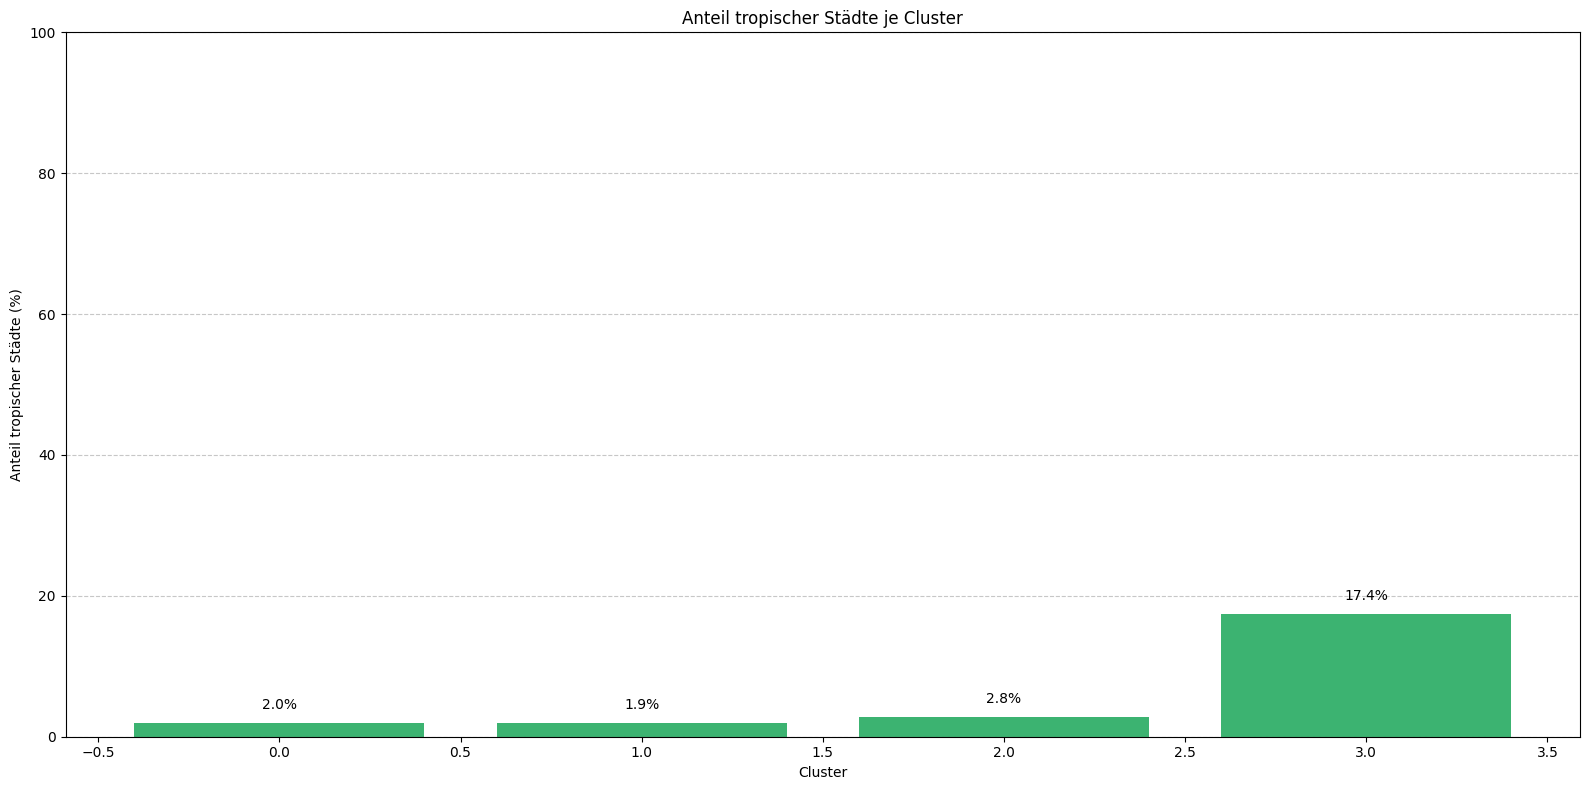

In [84]:
# 1. Cluster für tropisch/nicht-tropisch übernehmen (nicht neu fitten!)
data_tropical['cluster'] = data.loc[data_tropical.index, 'cluster']
data_non_tropical = data[~data.index.isin(data_tropical.index)].copy()
data_non_tropical['cluster'] = data.loc[data_non_tropical.index, 'cluster']

# 2. Verteilungen zählen
tropische_verteilung = data_tropical.groupby('cluster').size()
nicht_tropisch_verteilung = data_non_tropical.groupby('cluster').size()
gesamt = data.groupby('cluster').size()  # bereits global
print("Tropische Cluster:")
print(tropische_verteilung)
print("Nicht-tropische Cluster:")
print(nicht_tropisch_verteilung)
print("Gesamtverteilung:")
print(gesamt)

# 3. Prozentanteile berechnen
anteil_tropisch = (tropische_verteilung / gesamt * 100).fillna(0).round(1)
anteil_nicht_tropisch = (nicht_tropisch_verteilung / gesamt * 100).fillna(0).round(1)

# 4. Plot
plt.figure(figsize=(16, 8))
bars = plt.bar(anteil_tropisch.index, anteil_tropisch.values, color='mediumseagreen')
plt.title('Anteil tropischer Städte je Cluster')
plt.xlabel('Cluster')
plt.ylabel('Anteil tropischer Städte (%)')
plt.ylim(0, 100)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{height:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Analyse der Clusterverteilung: Tropische vs. Nicht-tropische Städte

Die folgende Tabelle zeigt, wie viele Städte aus tropischen bzw. nicht-tropischen Regionen in jedem Cluster vertreten sind und welchen Anteil tropische Städte innerhalb des Clusters ausmachen:

| Cluster | Tropisch | Nicht-tropisch | Anteil tropisch (%) |
|---------|----------|----------------|----------------------|
| 0       | 1        | 48             | 2.0 %                |
| 1       | 6        | 307            | 1.9 %                |
| 2       | 5        | 176            | 2.8 %                |
| 3       | 66       | 314            | **17.4 %**           |

---

### Analyse der Clusterverteilung nach Herkunftsregion

Um die Zusammensetzung der ermittelten Cluster zu bewerten, wurde untersucht, wie sich tropische und nicht-tropische Städte über die vier gebildeten Cluster verteilen. Dabei zeigt sich eine deutlich ungleiche Verteilung zwischen den beiden Gruppen.

### Tropische Städte konzentrieren sich auf ein einziges Cluster

Die tropischen Städte sind nahezu ausschließlich im Cluster 3 vertreten. Von insgesamt 380 Städten in diesem Cluster stammen 66 aus tropischen Ländern, was einem Anteil von 17,4 % entspricht. In den anderen drei Clustern liegt der Anteil tropischer Städte bei lediglich 1,9 % bis 2,8 %. Diese starke Konzentration legt nahe, dass tropische Städte aus Sicht der Clusteranalyse strukturell sehr ähnlich sind und gemeinsam ein bestimmtes Profil aufweisen.

### Nicht-tropische Städte über alle Cluster hinweg verteilt

Im Gegensatz dazu sind die nicht-tropischen Städte wesentlich breiter verteilt. Alle drei verbleibenden Cluster (0, 1 und 2) werden fast ausschließlich von nicht-tropischen Städten dominiert. Besonders deutlich wird dies bei Cluster 1, das mit 307 nicht-tropischen Städten das größte Einzelcluster darstellt. Auch Cluster 2 enthält 176 dieser Städte, während Cluster 0 auf 48 kommt. Damit zeigt sich, dass nicht-tropische Städte sehr heterogen sind und sowohl günstige als auch hochpreisige Städte umfassen.

### Verbindung zur Hypothese 2

Die beobachtete Verteilung stützt die aufgestellte Hypothese 2:

> *Tropisch warme Länder haben tendenziell niedrigere Kosten als Europa und Nordamerika.*

Diese Aussage wird durch die Tatsache gestützt, dass sich tropische Städte im globalen Clustering fast ausschließlich in jenem Cluster wiederfinden, das – wie zuvor anhand der Cluster-Heatmaps festgestellt – die **niedrigsten durchschnittlichen Lebenshaltungskosten** aufweist. Cluster 3 ist in fast allen Kostenkategorien deutlich günstiger als die übrigen Gruppen und bildet somit ein klares Gegengewicht zu Clustern wie 0 oder 1, in denen westliche Städte mit hohem Preisniveau dominieren.

Darüber hinaus verdeutlicht die enge Gruppierung tropischer Städte, dass diese Länder neben einem insgesamt niedrigeren Preisniveau auch eine gewisse Homogenität in ihrer Kostenstruktur aufweisen. Die hohe Streuung nicht-tropischer Städte über sämtliche Cluster zeigt dagegen, dass westliche Städte deutlich differenzierter ausfallen und sich in ihrer wirtschaftlichen Struktur und Infrastrukturstärke stärker voneinander unterscheiden.

### Schlussfolgerung

Insgesamt unterstreicht die Clusteranalyse den Zusammenhang zwischen geographischer Lage und wirtschaftlichem Umfeld. Tropische Städte bilden eine relativ homogene, kostengünstige Gruppe innerhalb des globalen Clustermodells, während nicht-tropische Städte breiter gestreut sind und sowohl günstige als auch hochpreisige Cluster dominieren. Die Hypothese, dass tropisch warme Länder tendenziell mit niedrigeren Lebenshaltungskosten einhergehen, lässt sich auf Basis dieser Ergebnisse klar bestätigen.



## Aufg 6 Draft: 
### Anleitung für Remote Worker: Günstige & exotische Städte für 6 Monate Workation  

### 🌴 **Top 5 Empfohlene Städte** (Basierend auf Kosten & Lebensqualität)  

| Stadt          | Land         | Durch. Monatliche Kosten* | Highlights                     |  
|----------------|--------------|-------------------------|--------------------------------|  
| **Hanoi**      | Vietnam      | 850 USD                 | Tropisches Klima, Küstennähe, Niedrige Mieten (250 USD für 1-Zimmer-Wohnung) |  
| **Medellín**   | Kolumbien    | 1,100 USD               | Bergpanorama, Gute Internet-Infrastruktur (60 Mbps: 20 USD/Monat) |  
| **Canggu**     | Indonesien   | 1,300 USD               | Strandnähe, Kreativ-Community, Exotisches Food (Äpfel: 1.8 USD/kg) |  
| **Lagos**      | Nigeria      | 950 USD                 | Abgelegen, Afrika-Flair, Niedrige Lebensmittelpreise (Reis: 1.2 USD/kg) |  
| **Chiang Mai** | Thailand     | 1,000 USD               | Berglage, Co-Working Spaces, Günstige Nebenkosten (Strom: 40 USD/Monat) |  

*Inkl. Miete, Essen, Internet, Transport  

---

### 📉 **Wichtigste Kostentreiber – So sparen Sie**  

#### 1. **Wohnkosten optimieren**  
- **City Center vs. Außerhalb**: In Hanoi sparen Sie 40% Miete, wenn Sie 15 Min. außerhalb wohnen (Beispiel: 250 USD → 150 USD).  
- **Tipp**: Nutzen Sie lokale Plattformen wie *Nhadat24h* (Vietnam) statt Airbnb.  

#### 2. **Lebensmittelbudget planen**  
- Teuerste Städte für Äpfel: Europa (3.5 USD/kg) vs. **Günstigste**: Südostasien (1.2 USD/kg).  
- Lokale Märkte > Supermärkte: In Chiang Mai kostet 1 kg Tomaten auf dem Markt 0.8 USD, im Supermarkt 1.5 USD.  

#### 3. **Internetkosten checken**  
- **Preis-Leistungs-Sieger**:  
  - Vietnam: 60 Mbps für 15 USD/Monat  
  - **Vorsicht**: In Nigeria (Lagos) schwankt die Geschwindigkeit stark – LTE-Hotspot empfehlenswert.  

---

## 🌍 **Regionen im Vergleich** (Tropisch vs. Europa)  

| Kategorie       | Tropische Städte ⛱️ | Europa 🏰 |  
|-----------------|---------------------|----------|  
| **Miete (1-Zimmer)** | 200–400 USD         | 800–1,500 USD |  
| **Äpfel (1 kg)**     | 1.2–2.0 USD         | 3.0–4.5 USD   |  
| **Internet (60 Mbps)** | 15–25 USD        | 35–60 USD     |  
| **Durchschnittsgehalt** | 500–1,200 USD    | 2,500–4,000 USD |  

---

## ✅ **Checkliste: So finden Sie Ihre perfekte Stadt**  

1. **Klima priorisieren**  
   ☐ Tropisch warm (ganzjährig >25°C)  
   ☐ Gemäßigt (z. B. Medellín: "Ewiger Frühling")  

2. **Infrastruktur prüfen**  
   ☐ Mind. 50 Mbps Internet (siehe Spalte `x38` im Datensatz)  
   ☐ ÖPNV-Verfügbarkeit (z. B. Lagos: Motorradtaxis günstiger als Uber)  

3. **Sicherheit analysieren**  
   ☐ Numbeo Crime Index < 40 (z. B. Chiang Mai: 28)  
   ☐ Expat-Communities vor Ort (Facebook-Gruppen checken)  

4. **Kultur einbeziehen**  
   ☐ Sprachbarriere (Englischlevel: Hoch in Canggu, Gering in Hanoi)  
   ☐ Feiertage/Karneval (z. B. Medellín: Feria de las Flores im August)  

---

## 💡 **Profi-Tipps für die ersten Wochen**  
- **Mietverhandlungen**: In Vietnam/Kolumbien sind 10–20% Rabatt üblich, wenn Sie 6 Monate im Voraus zahlen.  
- **Steuern**: In Thailand gilt **0% Einkommenssteuer** für Remote Worker mit Touristenvisum.  
- **Gesundheit**: Travel Insurance mit **COVID-Abdeckung** (z. B. SafetyWing: 40 USD/Monat).  

---

**Letzte Aktualisierung**: März 2025 | Datenquelle: Global Cost of Living Dataset (Kaggle), API Countries (https://www.apicountries.com/countries)

## Veränderungen

### !Emojis wegmachen!

Wissenschaftlicher

~~Hypothese 1 Tauschen~~

Mehr auf Hypothesen eingehen

~~Ausgangsituation bisschen ändern~~

~~Nr. 2 etwas mehr begründung~~

Nr. 3 mehr Fließtext

Nr. 4 Mehr Markdown

~~Nr. 5 Mehr auf Hypothesen eingehen~~

Nr. 6 Fast komplett überarbeiten (Inhalt)